In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Controls appearance of seaborn plots. Options: paper, notebook, talk, or poster
SEABORN_CONTEXT = 'talk' 
SEABORN_PALETTE = sns.color_palette("bright")

sns.set_context(SEABORN_CONTEXT)

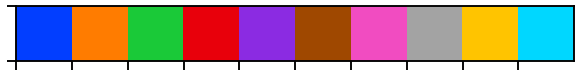

In [4]:
sns.palplot(SEABORN_PALETTE)

In [5]:
df_population = pd.read_csv('PEP_2018_PEPANNRES_with_ann.csv', encoding='latin1')
df_population = df_population.groupby('State', as_index=False)['Population'].sum()
df_population = df_population.rename(columns={"State": "state", "Population": "population"})
df_population['state'] = df_population['state'].apply(lambda state: state.strip())
df_population

state  population
0                Alabama     4887871
1                 Alaska      737438
2                Arizona     7171646
3               Arkansas     3013825
4             California    39557045
5               Colorado     5695564
6            Connecticut     3572665
7               Delaware      967171
8   District of Columbia      702455
9                Florida    21299325
10               Georgia    10519475
11                Hawaii     1420491
12                 Idaho     1754208
13              Illinois    12741080
14               Indiana     6691878
15                  Iowa     3156145
16                Kansas     2911505
17              Kentucky     4468402
18             Louisiana     4659978
19                 Maine     1338404
20              Maryland     6042718
21         Massachusetts     6902149
22              Michigan     9995915
23             Minnesota     5611179
24           Mississippi     2986530
25              Missouri     6126452
26               Montana     1062305
27              Nebraska     1929268
28                Nevada     3034392
29         New Hampshire     1356458
30            New Jersey     8908520
31            New Mexico     2095428
32              New York    19542209
33        North Carolina    10383620
34          North Dakota      760077
35                  Ohio    11689442
36              Oklahoma     3943079
37                Oregon     4190713
38          Pennsylvania    12807060
39          Rhode Island     1057315
40        South Carolina     5084127
41          South Dakota      882235
42             Tennessee     6770010
43                 Texas    28701845
44                  Utah     3161105
45               Vermont      626299
46              Virginia     8330345
47            Washington     7535591
48         West Virginia     1805832
49             Wisconsin     5813568
50               Wyoming      577737

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df = df.loc[df['fips'].notnull()]
df['fips'] = df['fips'].astype(int)
df


date      county       state   fips  cases  deaths
0      2020-01-21   Snohomish  Washington  53061      1       0
1      2020-01-22   Snohomish  Washington  53061      1       0
2      2020-01-23   Snohomish  Washington  53061      1       0
3      2020-01-24        Cook    Illinois  17031      1       0
4      2020-01-24   Snohomish  Washington  53061      1       0
...           ...         ...         ...    ...    ...     ...
26194  2020-04-01    Sheridan     Wyoming  56033     10       0
26195  2020-04-01    Sublette     Wyoming  56035      1       0
26196  2020-04-01  Sweetwater     Wyoming  56037      3       0
26197  2020-04-01       Teton     Wyoming  56039     26       0
26198  2020-04-01    Washakie     Wyoming  56043      1       0

[25803 rows x 6 columns]

In [7]:
most_recent_date = df['date'].sort_values().unique()[-1]
most_recent_date

'2020-04-01'

In [8]:
df = df.loc[df['date'] == most_recent_date].sort_values('cases', ascending=False).head(60)
df

date                county                 state   fips  cases  \
25324  2020-04-01           Westchester              New York  36119  10683   
25296  2020-04-01                Nassau              New York  36059   9555   
25316  2020-04-01               Suffolk              New York  36103   7605   
24468  2020-04-01                  Cook              Illinois  17031   5152   
24954  2020-04-01                 Wayne              Michigan  26163   4470   
24121  2020-04-01           Los Angeles            California   6037   3518   
25227  2020-04-01                Bergen            New Jersey  34003   3494   
25308  2020-04-01              Rockland              New York  36087   3321   
26084  2020-04-01                  King            Washington  53033   2498   
24256  2020-04-01            Miami-Dade               Florida  12086   2415   
24807  2020-04-01               Orleans             Louisiana  22071   2270   
25232  2020-04-01                 Essex            New Jersey  34013   2262   
24208  2020-04-01             Fairfield           Connecticut   9001   1986   
24936  2020-04-01               Oakland              Michigan  26125   1910   
25234  2020-04-01                Hudson            New Jersey  34017   1910   
25302  2020-04-01                Orange              New York  36071   1756   
25245  2020-04-01                 Union            New Jersey  34039   1661   
24884  2020-04-01               Suffolk         Massachusetts  25025   1624   
24880  2020-04-01             Middlesex         Massachusetts  25017   1582   
25241  2020-04-01               Passaic            New Jersey  34031   1494   
25237  2020-04-01             Middlesex            New Jersey  34023   1493   
25621  2020-04-01          Philadelphia          Pennsylvania  42101   1478   
24797  2020-04-01             Jefferson             Louisiana  22051   1433   
24226  2020-04-01               Broward               Florida  12011   1348   
26096  2020-04-01             Snohomish            Washington  53061   1304   
25238  2020-04-01              Monmouth            New Jersey  34025   1301   
25240  2020-04-01                 Ocean            New Jersey  34029   1209   
24564  2020-04-01                Marion               Indiana  18097   1117   
24926  2020-04-01                Macomb              Michigan  26099   1088   
25209  2020-04-01                 Clark                Nevada  32003    961   
24143  2020-04-01           Santa Clara            California   6085    956   
25239  2020-04-01                Morris            New Jersey  34027    942   
24876  2020-04-01                 Essex         Massachusetts  25009    885   
24042  2020-04-01              Maricopa               Arizona   4013    871   
24137  2020-04-01             San Diego            California   6073    849   
25859  2020-04-01                Harris                 Texas  48201    847   
24882  2020-04-01               Norfolk         Massachusetts  25021    829   
26162  2020-04-01             Milwaukee             Wisconsin  55079    780   
25733  2020-04-01              Davidson             Tennessee  47037    673   
25616  2020-04-01            Montgomery          Pennsylvania  42091    649   
24334  2020-04-01                Fulton               Georgia  13121    638   
25833  2020-04-01                Dallas                 Texas  48113    631   
24263  2020-04-01            Palm Beach               Florida  12099    616   
24212  2020-04-01             New Haven           Connecticut   9009    611   
24130  2020-04-01                Orange            California   6059    606   
25446  2020-04-01              Cuyahoga                  Ohio  39035    589   
24169  2020-04-01                Denver              Colorado   8031    586   
24220  2020-04-01  District of Columbia  District of Columbia  11001    586   
24886  2020-04-01             Worcester         Massachusetts  25027    563   
24883  2020-04-01              Plymouth         Massachusetts  

In [9]:
# df_hospitals.loc[df_hospitals['fips'] == 'NOT AVAILABLE']

In [10]:
df_hospitals = pd.read_csv('us-hospitals.csv')
df_hospitals = df_hospitals.rename(columns={"COUNTYFIPS": "fips", "STATE": "state", "BEDS": "beds"})
df_hospitals = df_hospitals.loc[(df_hospitals.beds != -999) & (df_hospitals['fips'] != 'NOT AVAILABLE')]
df_hospitals['fips'] = df_hospitals['fips'].astype(int)
df_hospitals

X          Y  OBJECTID        ID  \
0     -83.387732  39.348667      3001  12645123   
1     -81.919907  40.565095      3002  17244654   
2     -82.450635  40.048302      3003   2543055   
3     -83.755531  40.369542      3004   5843311   
4     -82.224713  41.295065      3005   5544074   
...          ...        ...       ...       ...   
7570  -89.634245  44.931130      7571   6254403   
7571  -87.954473  42.859866      7572   6653132   
7572 -117.566294  34.103714      7573  24091730   
7573 -117.071712  32.617494      7574  34491911   
7574 -122.405762  37.756576      7575  39094110   

                                                   NAME  \
0                       ADENA GREENFIELD MEDICAL CENTER   
1                                     POMERENE HOSPITAL   
2                             LICKING MEMORIAL HOSPITAL   
3                                   MARY RUTAN HOSPITAL   
4                                  MERCY ALLEN HOSPITAL   
...                                                 ...   
7570                          NORTH CENTRAL HEALTH CARE   
7571          MIDWEST ORTHOPEDIC SPECIALTY HOSPITAL LLC   
7572                            KINDRED HOSPITAL RANCHO   
7573       PARADISE VALLEY HSP D/P APH BAYVIEW BEH HLTH   
7574  PRISCILLA CHAN & MARK ZUCKERBERG SAN FRANCISCO...   

                      ADDRESS              CITY state    ZIP           ZIP4  \
0         550 MIRABEAU STREET        GREENFIELD    OH  45123  NOT AVAILABLE   
1            981 WOOSTER ROAD       MILLERSBURG    OH  44654  NOT AVAILABLE   
2       1320 WEST MAIN STREET            NEWARK    OH  43055  NOT AVAILABLE   
3           205 PALMER AVENUE     BELLEFONTAINE    OH  43311  NOT AVAILABLE   
4      200 WEST LORAIN STREET           OBERLIN    OH  44074  NOT AVAILABLE   
...                       ...               ...   ...    ...            ...   
7570         1100 LAKEVIEW DR            WAUSAU    WI  54403  NOT AVAILABLE   
7571  10101 SOUTH 27TH STREET          FRANKLIN    WI  53132  NOT AVAILABLE   
7572   10841 WHITE OAK AVENUE  RANCHO CUCAMONGA    CA  91730  NOT AVAILABLE   
7573          330 MOSS STREET       CHULA VISTA    CA  91911  NOT AVAILABLE   
7574      1001 POTRERO AVENUE     SAN FRANCISCO    CA  94110  NOT AVAILABLE   

      ...                  VAL_DATE  \
0     ...  2014-02-10T00:00:00.000Z   
1     ...  2014-01-31T00:00:00.000Z   
2     ...  2014-02-10T00:00:00.000Z   
3     ...  2014-02-10T00:00:00.000Z   
4     ...  2014-02-10T00:00:00.000Z   
...   ...                       ...   
7570  ...  2014-02-10T00:00:00.000Z   
7571  ...  2014-01-13T00:00:00.000Z   
7572  ...  2014-02-10T00:00:00.000Z   
7573  ...  2014-02-10T00:00:00.000Z   
7574  ...  2014-02-10T00:00:00.000Z   

                                                WEBSITE       STATE_ID  \
0     http://www.adena.org/locations/detail.dT/adena...           1200   
1                       http://www.pomerenehospital.org           1202   
2                               http://www.lmhealth.org           1213   
3                              http://www.maryrutan.org           1214   
4     http://www.mercyonline.org/mercy_allen_hospita...           1219   
...                                                 ...            ...   
7570                              http://www.norcen.org            206   
7571                             http://www.mymosh.com/           1070   
7572                            http://www.khrancho.com  NOT AVAILABLE   
7573                                      NOT AVAILABLE  NOT AVAILABLE   
7574                             https://sfgh.ucsf.edu/  NOT AVAILABLE   

                            ALT_NAME ST_FIPS               OWNER TTL_STAFF  \
0                      NOT AVAILABLE      39          NON-PROFIT      -999   
1                      NOT AVAILABLE      39  GOVERNMENT - LOCAL      -999   
2                      NOT AVAILABLE      39          NON-PROFIT      -999   
3                      NOT AVAILABLE      39          NON-PROFIT      -999

In [11]:
df_hospitals.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'state', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'fips',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID',
       'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF', 'beds', 'TRAUMA',
       'HELIPAD'],
      dtype='object')

In [12]:
beds_per_county = df_hospitals.groupby('fips', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_county_50 = beds_per_county.head(50)
beds_per_county

fips   beds
158    6037  30371
474   17031  18259
2142  48201  15996
1506  36061  11052
291   12086  10243
...     ...    ...
1322  30071      6
1542  37015      6
1968  46077      6
890   22007      6
2206  48381      4

[2545 rows x 2 columns]

In [13]:
# for state in beds_per_state['state'].values: print(f"'{state}' : '{state}'")

In [14]:
state_dict = {
    'CA' : 'California',
    'TX' : 'Texas',
    'FL' : 'Florida',
    'NY' : 'New York',
    'OH' : 'Ohio',
    'PA' : 'Pennsylvania',
    'IL' : 'Illinois',
    'NJ' : 'New Jersey',
    'GA' : 'Georgia',
    'NC' : 'North Carolina',
    'MI' : 'Michigan',
    'TN' : 'Tennessee',
    'MO' : 'Missouri',
    'VA' : 'Virginia',
    'MA' : 'Massachusetts',
    'IN' : 'Indiana',
    'WI' : 'Wisconsin',
    'AL' : 'Alabama',
    'KY' : 'Kentucky',
    'LA' : 'Louisiana',
    'WA' : 'Washington',
    'MN' : 'Minnesota',
    'AZ' : 'Arizona',
    'OK' : 'Oklahoma',
    'SC' : 'South Carolina',
    'MS' : 'Mississippi',
    'IA' : 'Iowa',
    'MD' : 'Maryland',
    'CO' : 'Colorado',
    'AR' : 'Arkansas',
    'KS' : 'Kansas',
    'CT' : 'Connecticut',
    'WV' : 'West Virginia',
    'NV' : 'Nevada',
    'OR' : 'Oregon',
    'NE' : 'Nebraska',
    'PR' : 'Puerto Rico',
    'UT' : 'Utah',
    'NM' : 'New Mexico',
    'ME' : 'Maine',
    'DC' : 'District of Columbia',
    'MT' : 'Montana',
    'RI' : 'Rhode Island',
    'ND' : 'North Dakota',
    'ID' : 'Idaho',
    'SD' : 'South Dakota',
    'NH' : 'New Hampshire',
    'HI' : 'Hawaii',
    'DE' : 'Delaware',
    'WY' : 'Wyoming',
    'AK' : 'Alaska',
    'VT' : 'Vermont'
}

In [15]:
beds_per_state = df_hospitals.groupby('state', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_state['state'] = beds_per_state['state'].apply(lambda abbrev: state_dict.get(abbrev))
beds_per_state

state    beds
4             California  104034
44                 Texas   91310
9                Florida   72088
34              New York   57083
35                  Ohio   49177
38          Pennsylvania   46167
14              Illinois   35811
31            New Jersey   31359
10               Georgia   30778
27        North Carolina   27175
22              Michigan   26632
43             Tennessee   25551
24              Missouri   24026
46              Virginia   22196
19         Massachusetts   20882
15               Indiana   19415
49             Wisconsin   19131
1                Alabama   19000
17              Kentucky   18497
18             Louisiana   18413
48            Washington   15873
23             Minnesota   15778
3                Arizona   15452
36              Oklahoma   15177
41        South Carolina   15056
25           Mississippi   15020
12                  Iowa   13785
20              Maryland   13557
5               Colorado   11899
2               Arkansas   11699
16                Kansas   11261
6            Connecticut    9451
50         West Virginia    7772
33                Nevada    7771
37                Oregon    7624
29              Nebraska    7394
39           Puerto Rico    6334
45                  Utah    6110
32            New Mexico    5132
21                 Maine    4470
7   District of Columbia    4304
26               Montana    4126
40          Rhode Island    3985
28          North Dakota    3878
13                 Idaho    3802
42          South Dakota    3407
30         New Hampshire    3398
11                Hawaii    3365
8               Delaware    2780
51               Wyoming    1829
0                 Alaska    1813
47               Vermont    1468

In [16]:
df_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_states['date'] = pd.to_datetime(df_states['date'])
df_states = df_states.loc[df_states['date'] > '2020-03-04']
df_states = df_states.merge(df_population, how='left', on='state')
df_states = df_states.merge(beds_per_state, how='left', on='state')
df_states['cases_per_100k_people'] = df_states['cases'] / (df_states['population']/100_000)
df_states['beds_per_100k_people'] = df_states['beds'] / (df_states['population']/100_000)
df_states


date          state  fips  cases  deaths  population      beds  \
0    2020-03-05        Arizona     4      2       0   7171646.0   15452.0   
1    2020-03-05     California     6     67       1  39557045.0  104034.0   
2    2020-03-05       Colorado     8      2       0   5695564.0   11899.0   
3    2020-03-05        Florida    12      4       0  21299325.0   72088.0   
4    2020-03-05        Georgia    13      2       0  10519475.0   30778.0   
...         ...            ...   ...    ...     ...         ...       ...   
1358 2020-04-01       Virginia    51   1511      34   8330345.0   22196.0   
1359 2020-04-01     Washington    53   5588     249   7535591.0   15873.0   
1360 2020-04-01  West Virginia    54    191       2   1805832.0    7772.0   
1361 2020-04-01      Wisconsin    55   1550      33   5813568.0   19131.0   
1362 2020-04-01        Wyoming    56    137       0    577737.0    1829.0   

      cases_per_100k_people  beds_per_100k_people  
0                  0.027888            215.459603  
1                  0.169376            262.997400  
2                  0.035115            208.916975  
3                  0.018780            338.452040  
4                  0.019012            292.581141  
...                     ...                   ...  
1358              18.138504            266.447548  
1359              74.154768            210.640413  
1360              10.576842            430.383336  
1361              26.661768            329.075019  
1362              23.713212            316.580036  

[1363 rows x 9 columns]

In [17]:
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 0 to 7574
Data columns (total 34 columns):
X             6915 non-null float64
Y             6915 non-null float64
OBJECTID      6915 non-null int64
ID            6915 non-null int64
NAME          6915 non-null object
ADDRESS       6915 non-null object
CITY          6915 non-null object
state         6915 non-null object
ZIP           6915 non-null int64
ZIP4          6915 non-null object
TELEPHONE     6915 non-null object
TYPE          6915 non-null object
STATUS        6915 non-null object
POPULATION    6915 non-null int64
COUNTY        6915 non-null object
fips          6915 non-null int64
COUNTRY       6915 non-null object
LATITUDE      6915 non-null float64
LONGITUDE     6915 non-null float64
NAICS_CODE    6915 non-null int64
NAICS_DESC    6915 non-null object
SOURCE        6915 non-null object
SOURCEDATE    6915 non-null object
VAL_METHOD    6915 non-null object
VAL_DATE      6915 non-null object
WEBSITE       6915 n

In [18]:
df_merged = df.merge(beds_per_county, how='left', on='fips').sort_values(by='cases', ascending=False)
df_merged_50 = df_merged.head(50)
df_merged_50

date                county                 state   fips  cases  \
0   2020-04-01           Westchester              New York  36119  10683   
1   2020-04-01                Nassau              New York  36059   9555   
2   2020-04-01               Suffolk              New York  36103   7605   
3   2020-04-01                  Cook              Illinois  17031   5152   
4   2020-04-01                 Wayne              Michigan  26163   4470   
5   2020-04-01           Los Angeles            California   6037   3518   
6   2020-04-01                Bergen            New Jersey  34003   3494   
7   2020-04-01              Rockland              New York  36087   3321   
8   2020-04-01                  King            Washington  53033   2498   
9   2020-04-01            Miami-Dade               Florida  12086   2415   
10  2020-04-01               Orleans             Louisiana  22071   2270   
11  2020-04-01                 Essex            New Jersey  34013   2262   
12  2020-04-01             Fairfield           Connecticut   9001   1986   
13  2020-04-01               Oakland              Michigan  26125   1910   
14  2020-04-01                Hudson            New Jersey  34017   1910   
15  2020-04-01                Orange              New York  36071   1756   
16  2020-04-01                 Union            New Jersey  34039   1661   
17  2020-04-01               Suffolk         Massachusetts  25025   1624   
18  2020-04-01             Middlesex         Massachusetts  25017   1582   
19  2020-04-01               Passaic            New Jersey  34031   1494   
20  2020-04-01             Middlesex            New Jersey  34023   1493   
21  2020-04-01          Philadelphia          Pennsylvania  42101   1478   
22  2020-04-01             Jefferson             Louisiana  22051   1433   
23  2020-04-01               Broward               Florida  12011   1348   
24  2020-04-01             Snohomish            Washington  53061   1304   
25  2020-04-01              Monmouth            New Jersey  34025   1301   
26  2020-04-01                 Ocean            New Jersey  34029   1209   
27  2020-04-01                Marion               Indiana  18097   1117   
28  2020-04-01                Macomb              Michigan  26099   1088   
29  2020-04-01                 Clark                Nevada  32003    961   
30  2020-04-01           Santa Clara            California   6085    956   
31  2020-04-01                Morris            New Jersey  34027    942   
32  2020-04-01                 Essex         Massachusetts  25009    885   
33  2020-04-01              Maricopa               Arizona   4013    871   
34  2020-04-01             San Diego            California   6073    849   
35  2020-04-01                Harris                 Texas  48201    847   
36  2020-04-01               Norfolk         Massachusetts  25021    829   
37  2020-04-01             Milwaukee             Wisconsin  55079    780   
38  2020-04-01              Davidson             Tennessee  47037    673   
39  2020-04-01            Montgomery          Pennsylvania  42091    649   
40  2020-04-01                Fulton               Georgia  13121    638   
41  2020-04-01                Dallas                 Texas  48113    631   
42  2020-04-01            Palm Beach               Florida  12099    616   
43  2020-04-01             New Haven           Connecticut   9009    611   
44  2020-04-01                Orange            California   6059    606   
45  2020-04-01              Cuyahoga                  Ohio  39035    589   
46  2020-04-01                Denver              Colorado   8031    586   
47  2020-04-01  District of Columbia  District of Columbia  11001    586   
48  2020-04-01             Worcester         Massachusetts  25027    563   
49  2020-04-01              Plymouth         Massachusetts  25023    561   

    deaths   beds  
0       25   3235  
1       76   4343  
2       69   3583  
3       95  18259  
4      146   6079  
5       65  3

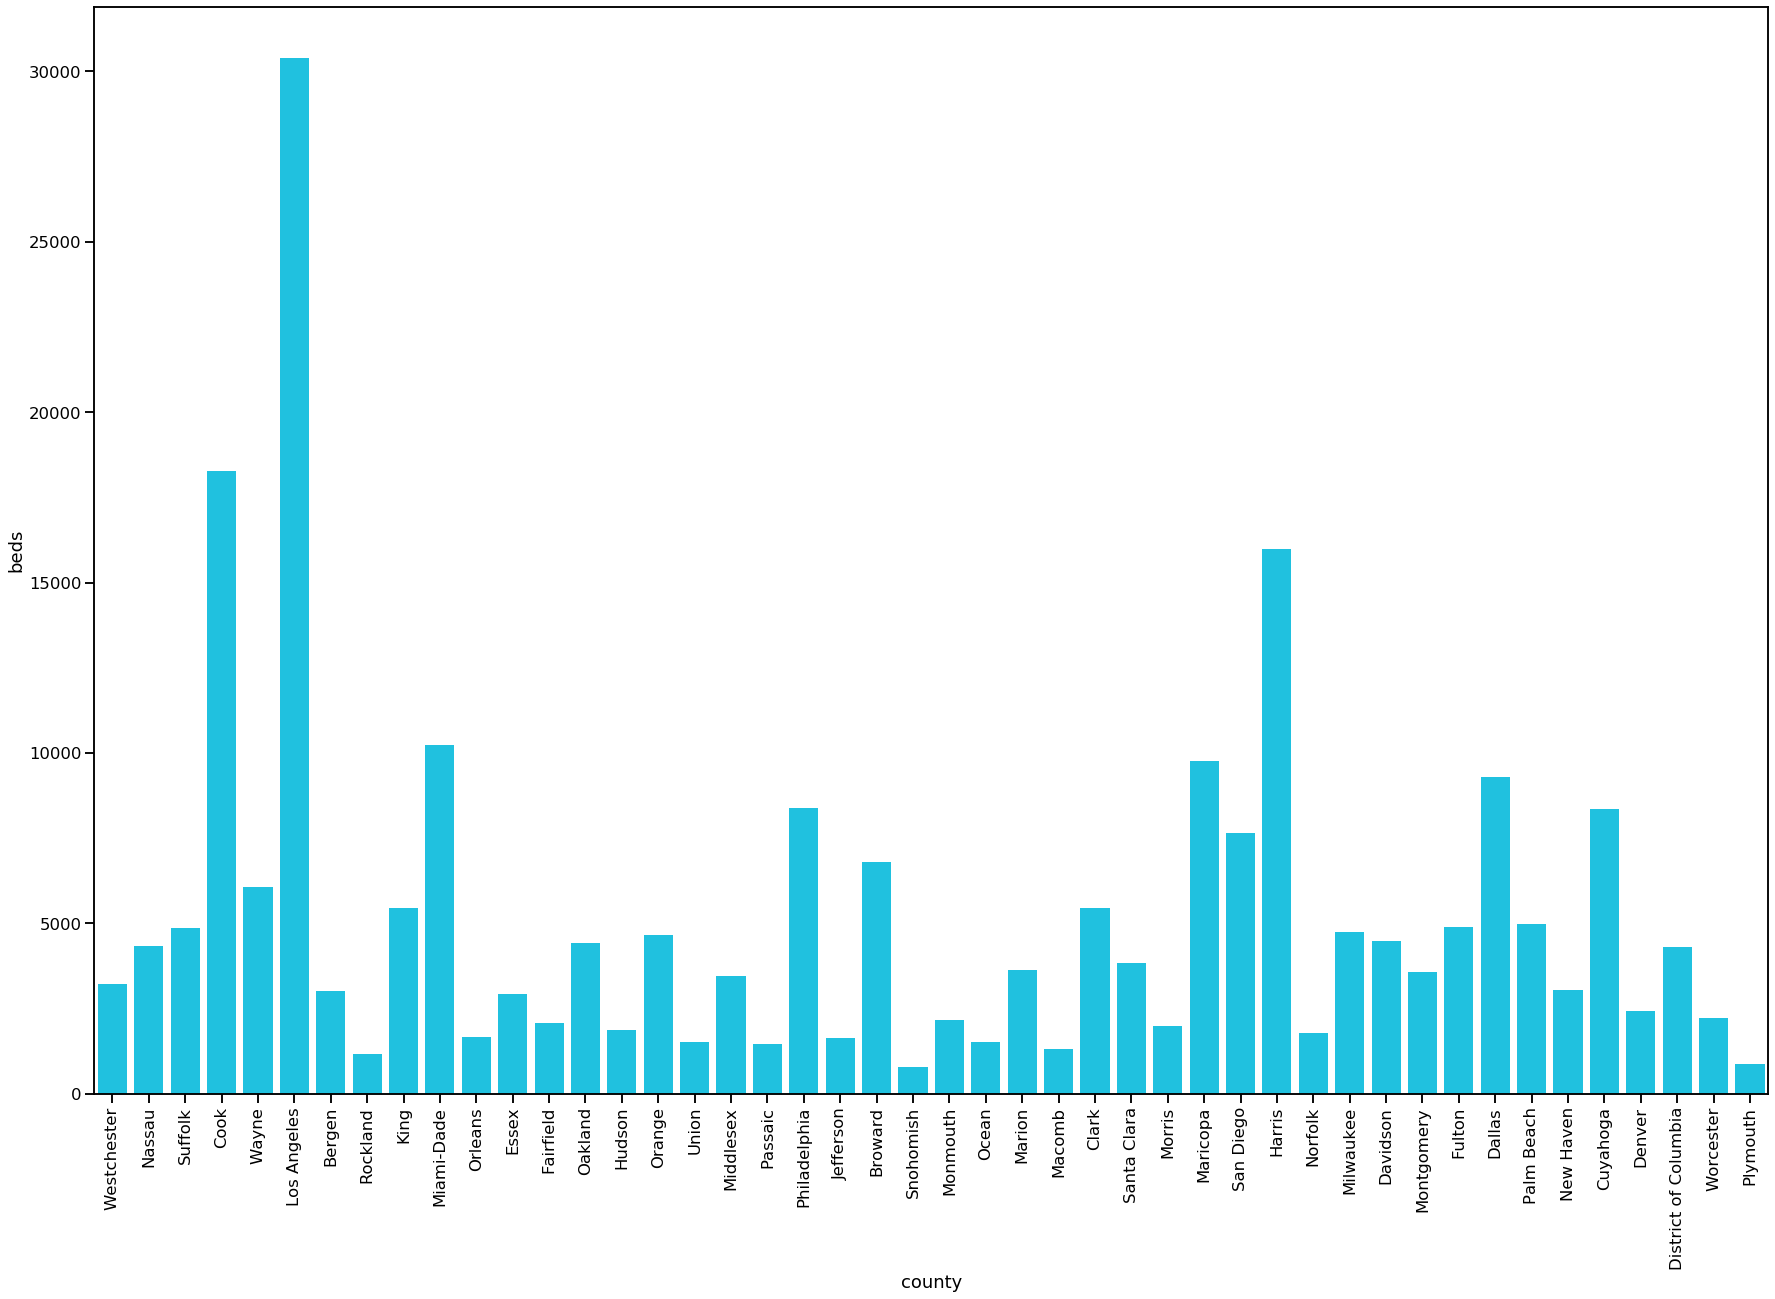

In [19]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_merged_50['county'], y=df_merged_50['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.xticks(rotation=90);

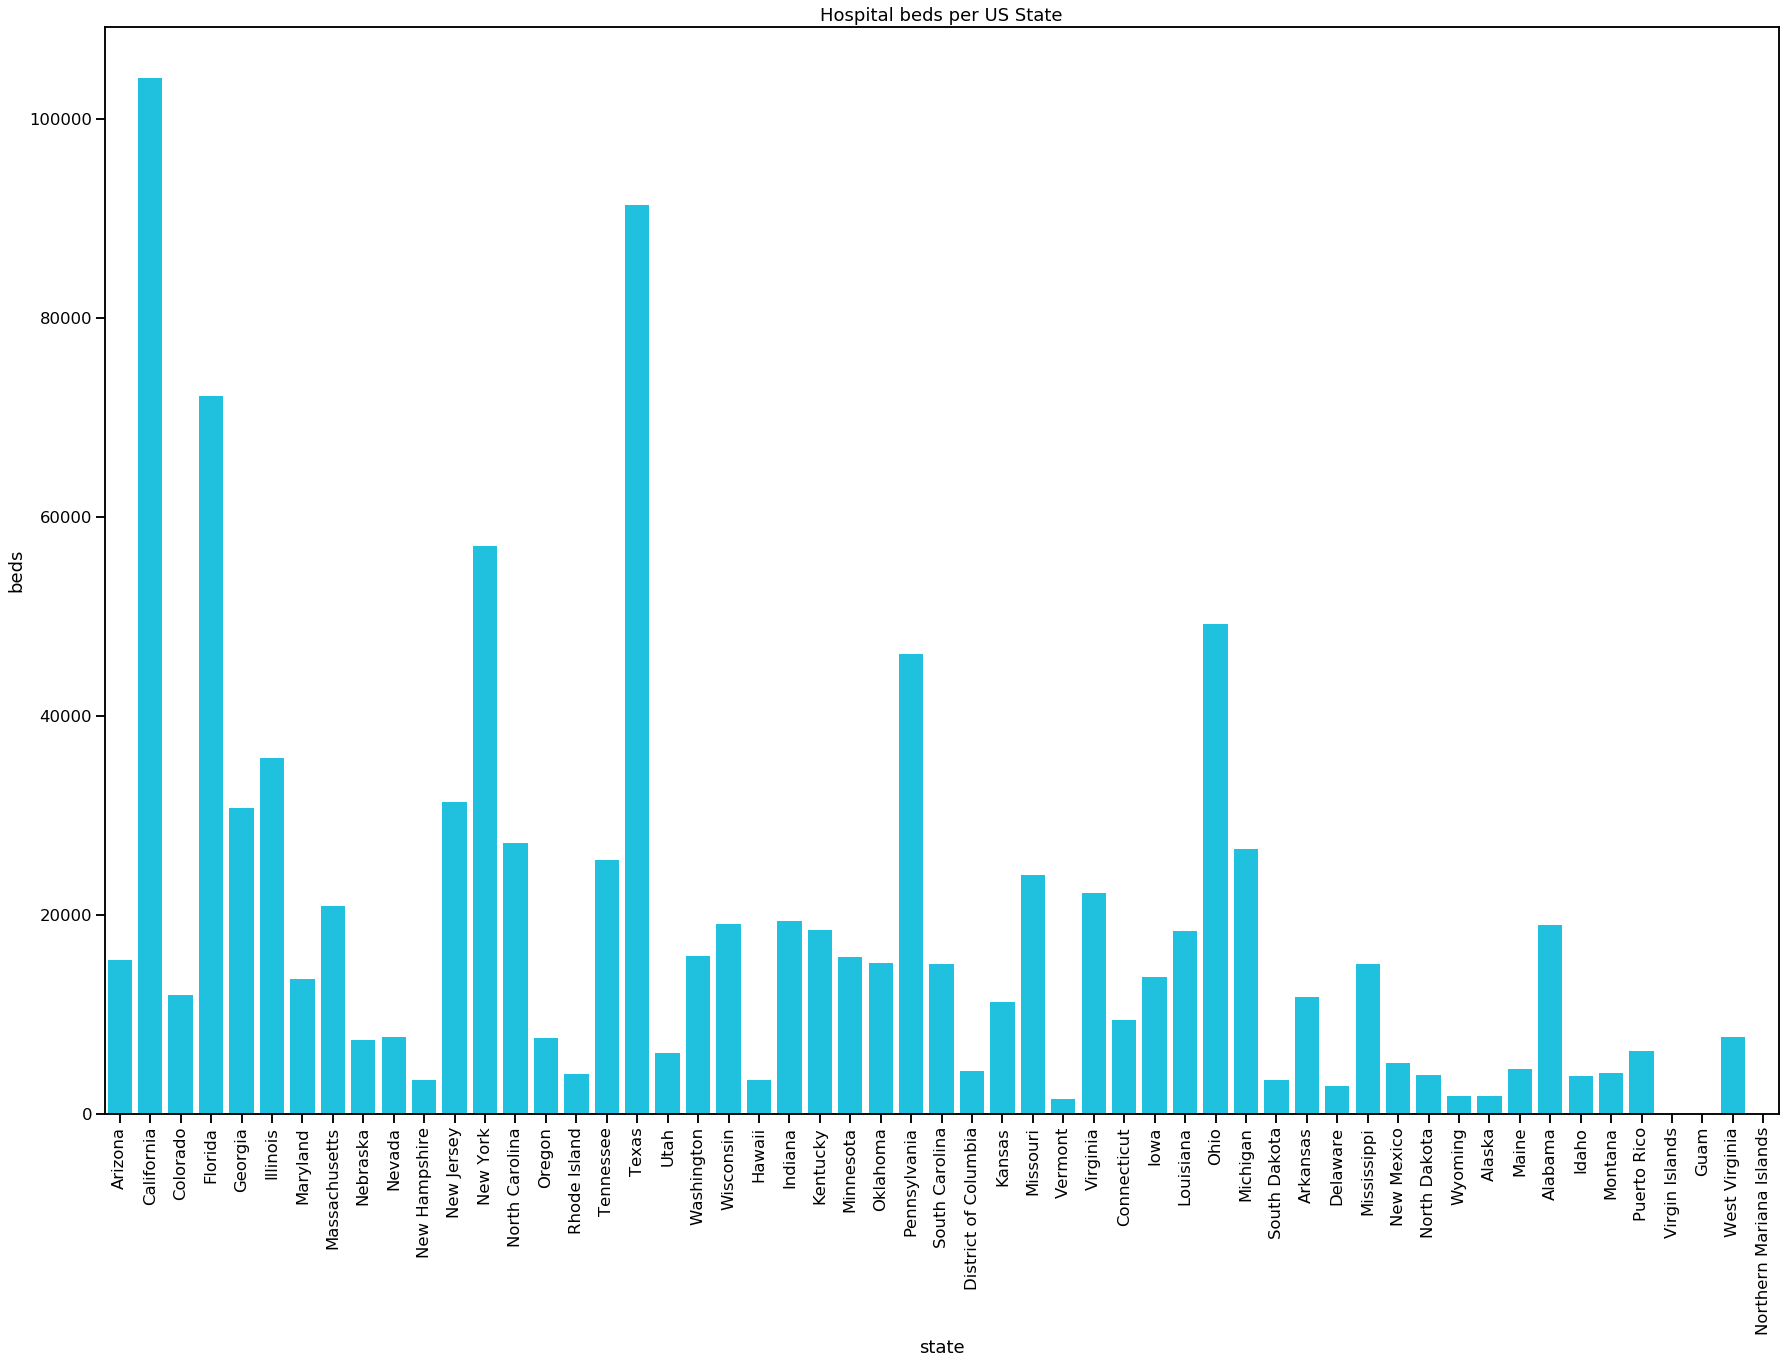

In [20]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per US State')
plt.xticks(rotation=90);

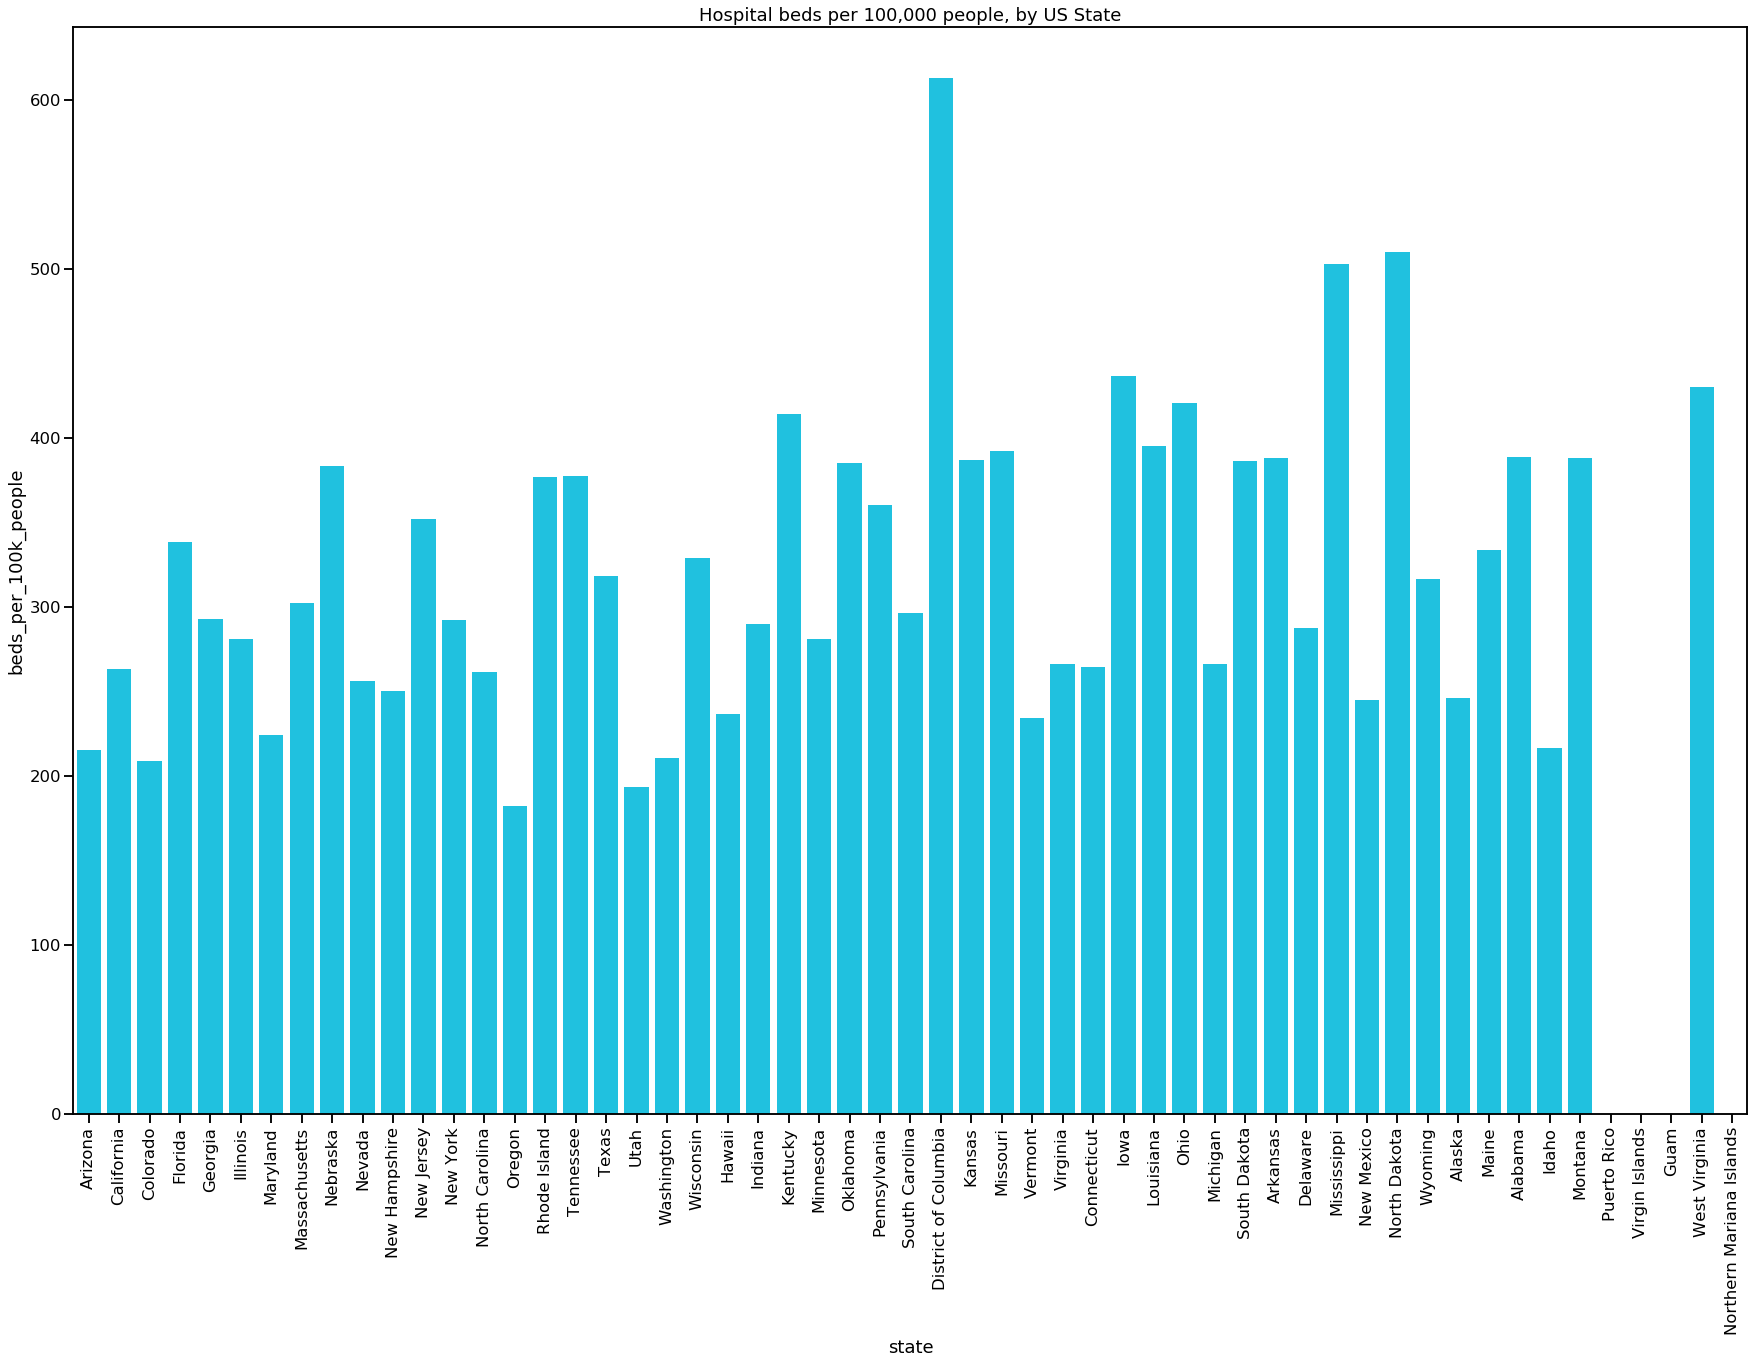

In [21]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds_per_100k_people'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per 100,000 people, by US State')
plt.xticks(rotation=90);

In [22]:
# df_ny = df_states.loc[df_states['state'] == 'New York']
# df_nj = df_states.loc[df_states['state'] == 'New Jersey']

In [23]:
df_states_latest = df_states.loc[df_states['date'] == most_recent_date].sort_values(by='cases', ascending=False)
df_states_latest

date                     state  fips  cases  deaths  population  \
1341 2020-04-01                  New York    36  83889    1941  19542209.0   
1339 2020-04-01                New Jersey    34  22255     355   8908520.0   
1312 2020-04-01                California     6   9816     212  39557045.0   
1331 2020-04-01                  Michigan    26   9293     336   9995915.0   
1317 2020-04-01                   Florida    12   7765     100  21299325.0   
1330 2020-04-01             Massachusetts    25   7738     122   6902149.0   
1322 2020-04-01                  Illinois    17   6980     146  12741080.0   
1327 2020-04-01                 Louisiana    22   6424     273   4659978.0   
1348 2020-04-01              Pennsylvania    42   5805      74  12807060.0   
1359 2020-04-01                Washington    53   5588     249   7535591.0   
1318 2020-04-01                   Georgia    13   4748     154  10519475.0   
1354 2020-04-01                     Texas    48   4261      63  28701845.0   
1314 2020-04-01               Connecticut     9   3557      85   3572665.0   
1313 2020-04-01                  Colorado     8   3346      80   5695564.0   
1323 2020-04-01                   Indiana    18   2565      65   6691878.0   
1345 2020-04-01                      Ohio    39   2547      65  11689442.0   
1353 2020-04-01                 Tennessee    47   2440      23   6770010.0   
1329 2020-04-01                  Maryland    24   1985      33   6042718.0   
1342 2020-04-01            North Carolina    37   1582      11  10383620.0   
1334 2020-04-01                  Missouri    29   1581      18   6126452.0   
1361 2020-04-01                 Wisconsin    55   1550      33   5813568.0   
1358 2020-04-01                  Virginia    51   1511      34   8330345.0   
1310 2020-04-01                   Arizona     4   1413      29   7171646.0   
1351 2020-04-01            South Carolina    45   1293      26   5084127.0   
1337 2020-04-01                    Nevada    32   1279      32   3034392.0   
1308 2020-04-01                   Alabama     1   1106      28   4887871.0   
1333 2020-04-01               Mississippi    28   1073      22   2986530.0   
1355 2020-04-01                      Utah    49   1012       7   3161105.0   
1347 2020-04-01                    Oregon    41    736      19   4190713.0   
1346 2020-04-01                  Oklahoma    40    719      30   3943079.0   
1332 2020-04-01                 Minnesota    27    689      17   5611179.0   
1326 2020-04-01                  Kentucky    21    682      20   4468402.0   
1321 2020-04-01                     Idaho    16    669       9   1754208.0   
1311 2020-04-01                  Arkansas     5    624      10   3013825.0   
1316 2020-04-01      District of Columbia    11    586      11    702455.0   
1350 2020-04-01              Rhode Island    44    566      10   1057315.0   
1324 2020-04-01                      Iowa    19    549       9   3156145.0   
1325 2020-04-01                    Kansas    20    488      11   2911505.0   
1338 2020-04-01             New Hampshire    33    415       4   1356458.0   
1315 2020-04-01                  Delaware    10    368      11    967171.0   
1340 2020-04-01                New Mexico    35    363       6   2095428.0   
1328 2020-04-01                     Maine    23    344       7   1338404.0   
1356 2020-04-01                   Vermont    50    321      16    626299.0   
1349 2020-04-01               Puerto Rico    72    286      11         NaN   
1320 2020-04-01                    Hawaii    15    258       1   1420491.0   
1336 2020-04-01                  Nebraska    31    249       5   1929268.0   
1335 2020-04-01                   Montana    30    217       5   1062305.0   
1360 2020-04-01             West Virginia    54    191       2   1805832.0   
1343 2020-04-01              North Dakota    38    147       3    760077.0   
1319 2020-04-01                      Guam    66    147       3         NaN   
1309 2020-04-01                  

In [24]:
group_size = 10
state_groups = []

# Initialize empty arrays for groups of states
for i in np.arange(0, len(df_states_latest['state']), group_size): 
    state_groups.append([])
    
for i, state in enumerate(df_states_latest['state']):
    state_groups[i // group_size].append(state)

state_groups

[['New York',
  'New Jersey',
  'California',
  'Michigan',
  'Florida',
  'Massachusetts',
  'Illinois',
  'Louisiana',
  'Pennsylvania',
  'Washington'],
 ['Georgia',
  'Texas',
  'Connecticut',
  'Colorado',
  'Indiana',
  'Ohio',
  'Tennessee',
  'Maryland',
  'North Carolina',
  'Missouri'],
 ['Wisconsin',
  'Virginia',
  'Arizona',
  'South Carolina',
  'Nevada',
  'Alabama',
  'Mississippi',
  'Utah',
  'Oregon',
  'Oklahoma'],
 ['Minnesota',
  'Kentucky',
  'Idaho',
  'Arkansas',
  'District of Columbia',
  'Rhode Island',
  'Iowa',
  'Kansas',
  'New Hampshire',
  'Delaware'],
 ['New Mexico',
  'Maine',
  'Vermont',
  'Puerto Rico',
  'Hawaii',
  'Nebraska',
  'Montana',
  'West Virginia',
  'North Dakota',
  'Guam'],
 ['Alaska',
  'Wyoming',
  'South Dakota',
  'Virgin Islands',
  'Northern Mariana Islands']]

In [25]:
# states_0 = df_states.loc[df_states['state'].isin(state_groups[0])]

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_0['date'], y=states_0['cases'], hue=states_0['state'], marker="o", dashes=False, ci=False)
# plt.xticks(rotation=90);
# plt.tight_layout()
# plt.show()

/Users/megarock/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


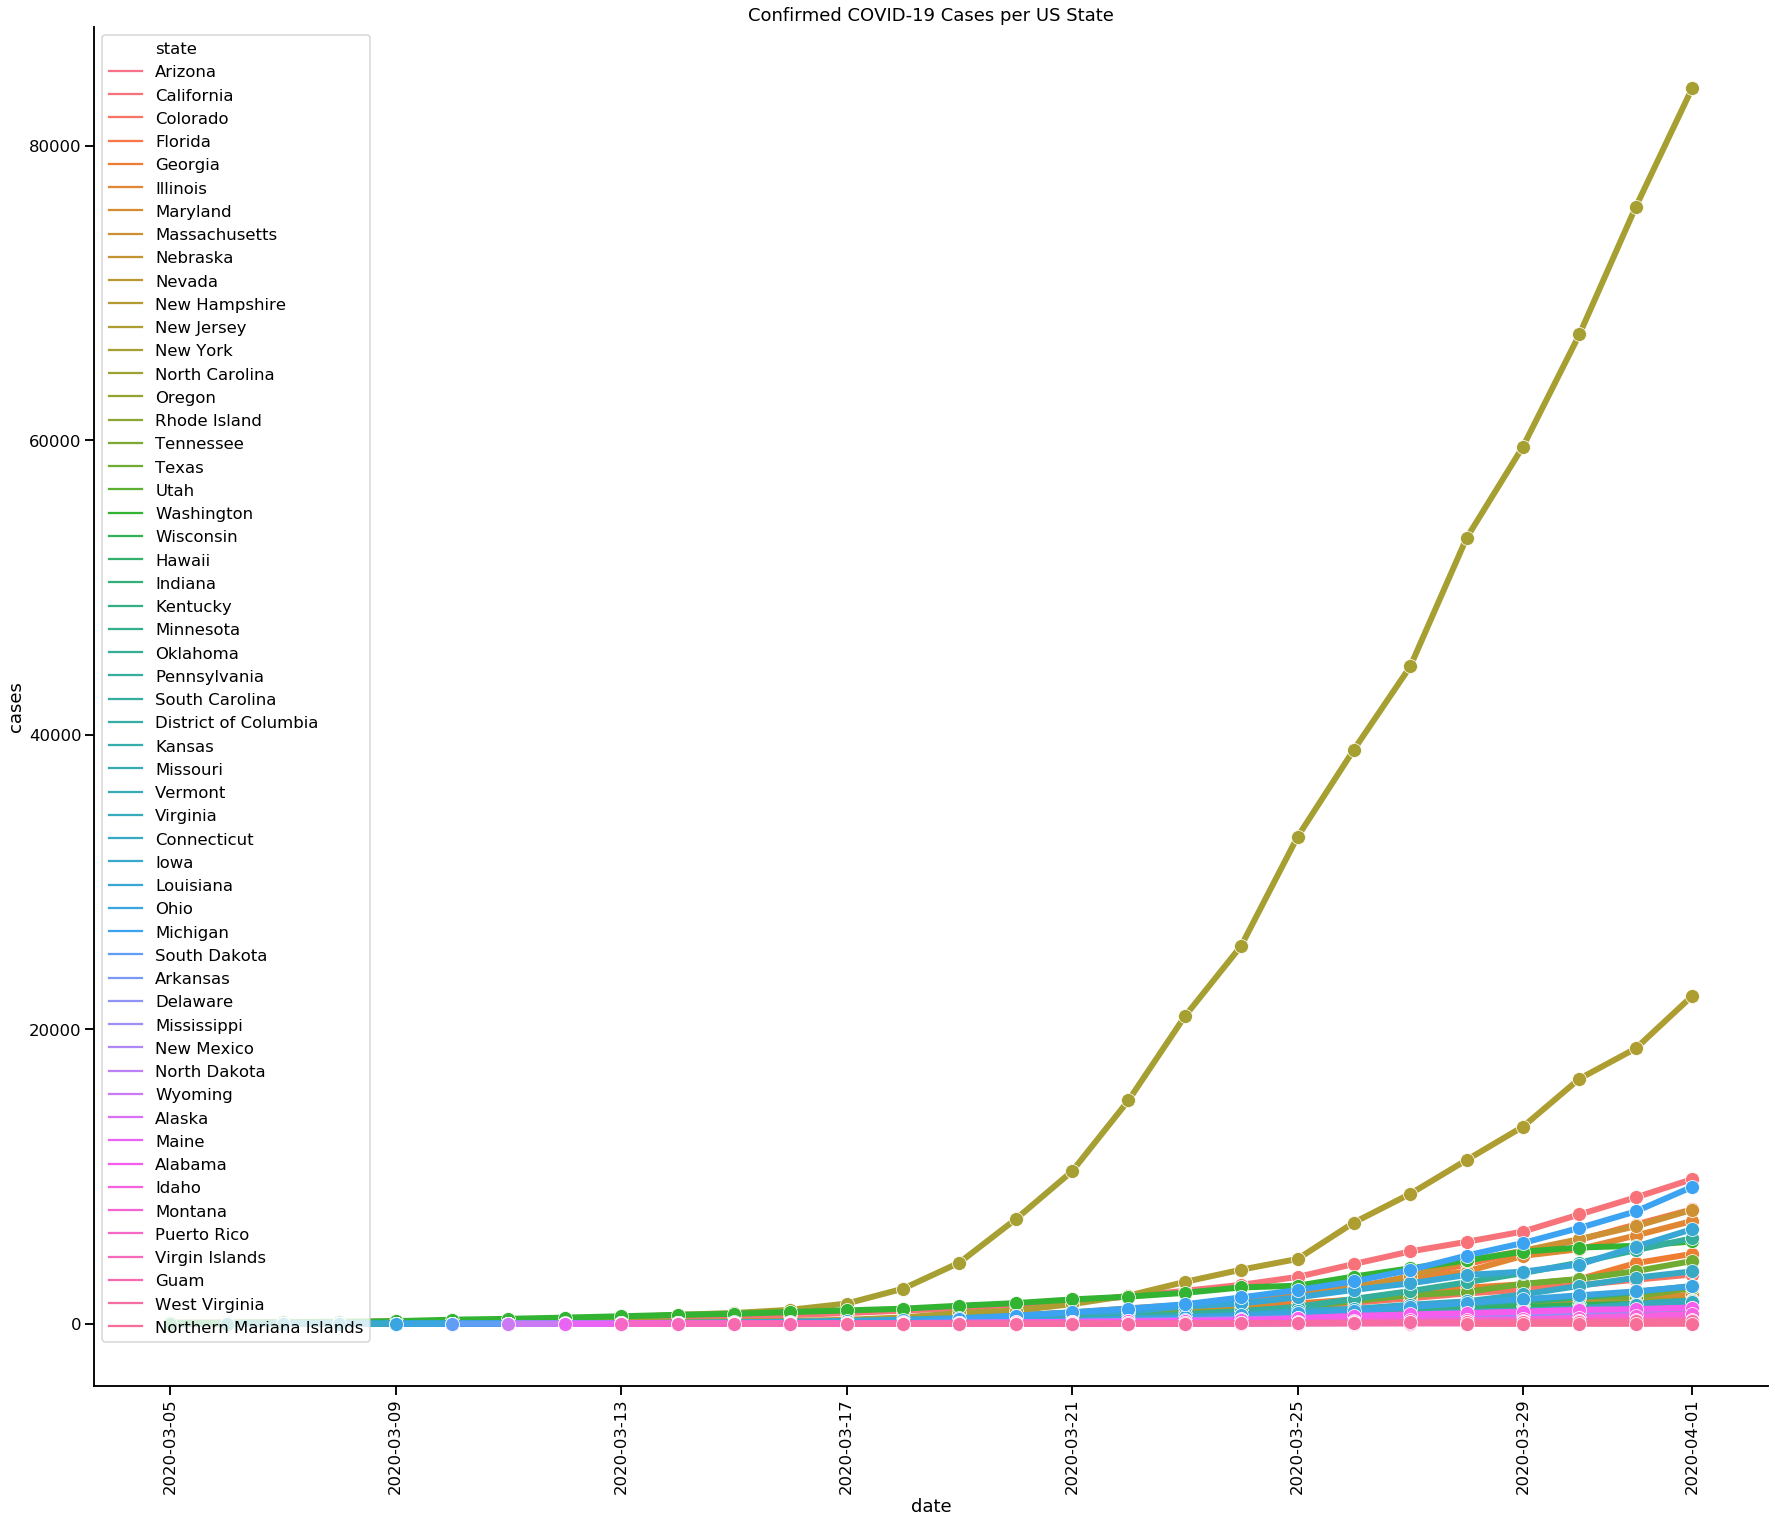

In [26]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['cases'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Cases per US State')
plt.xticks(rotation=90);
sns.despine()

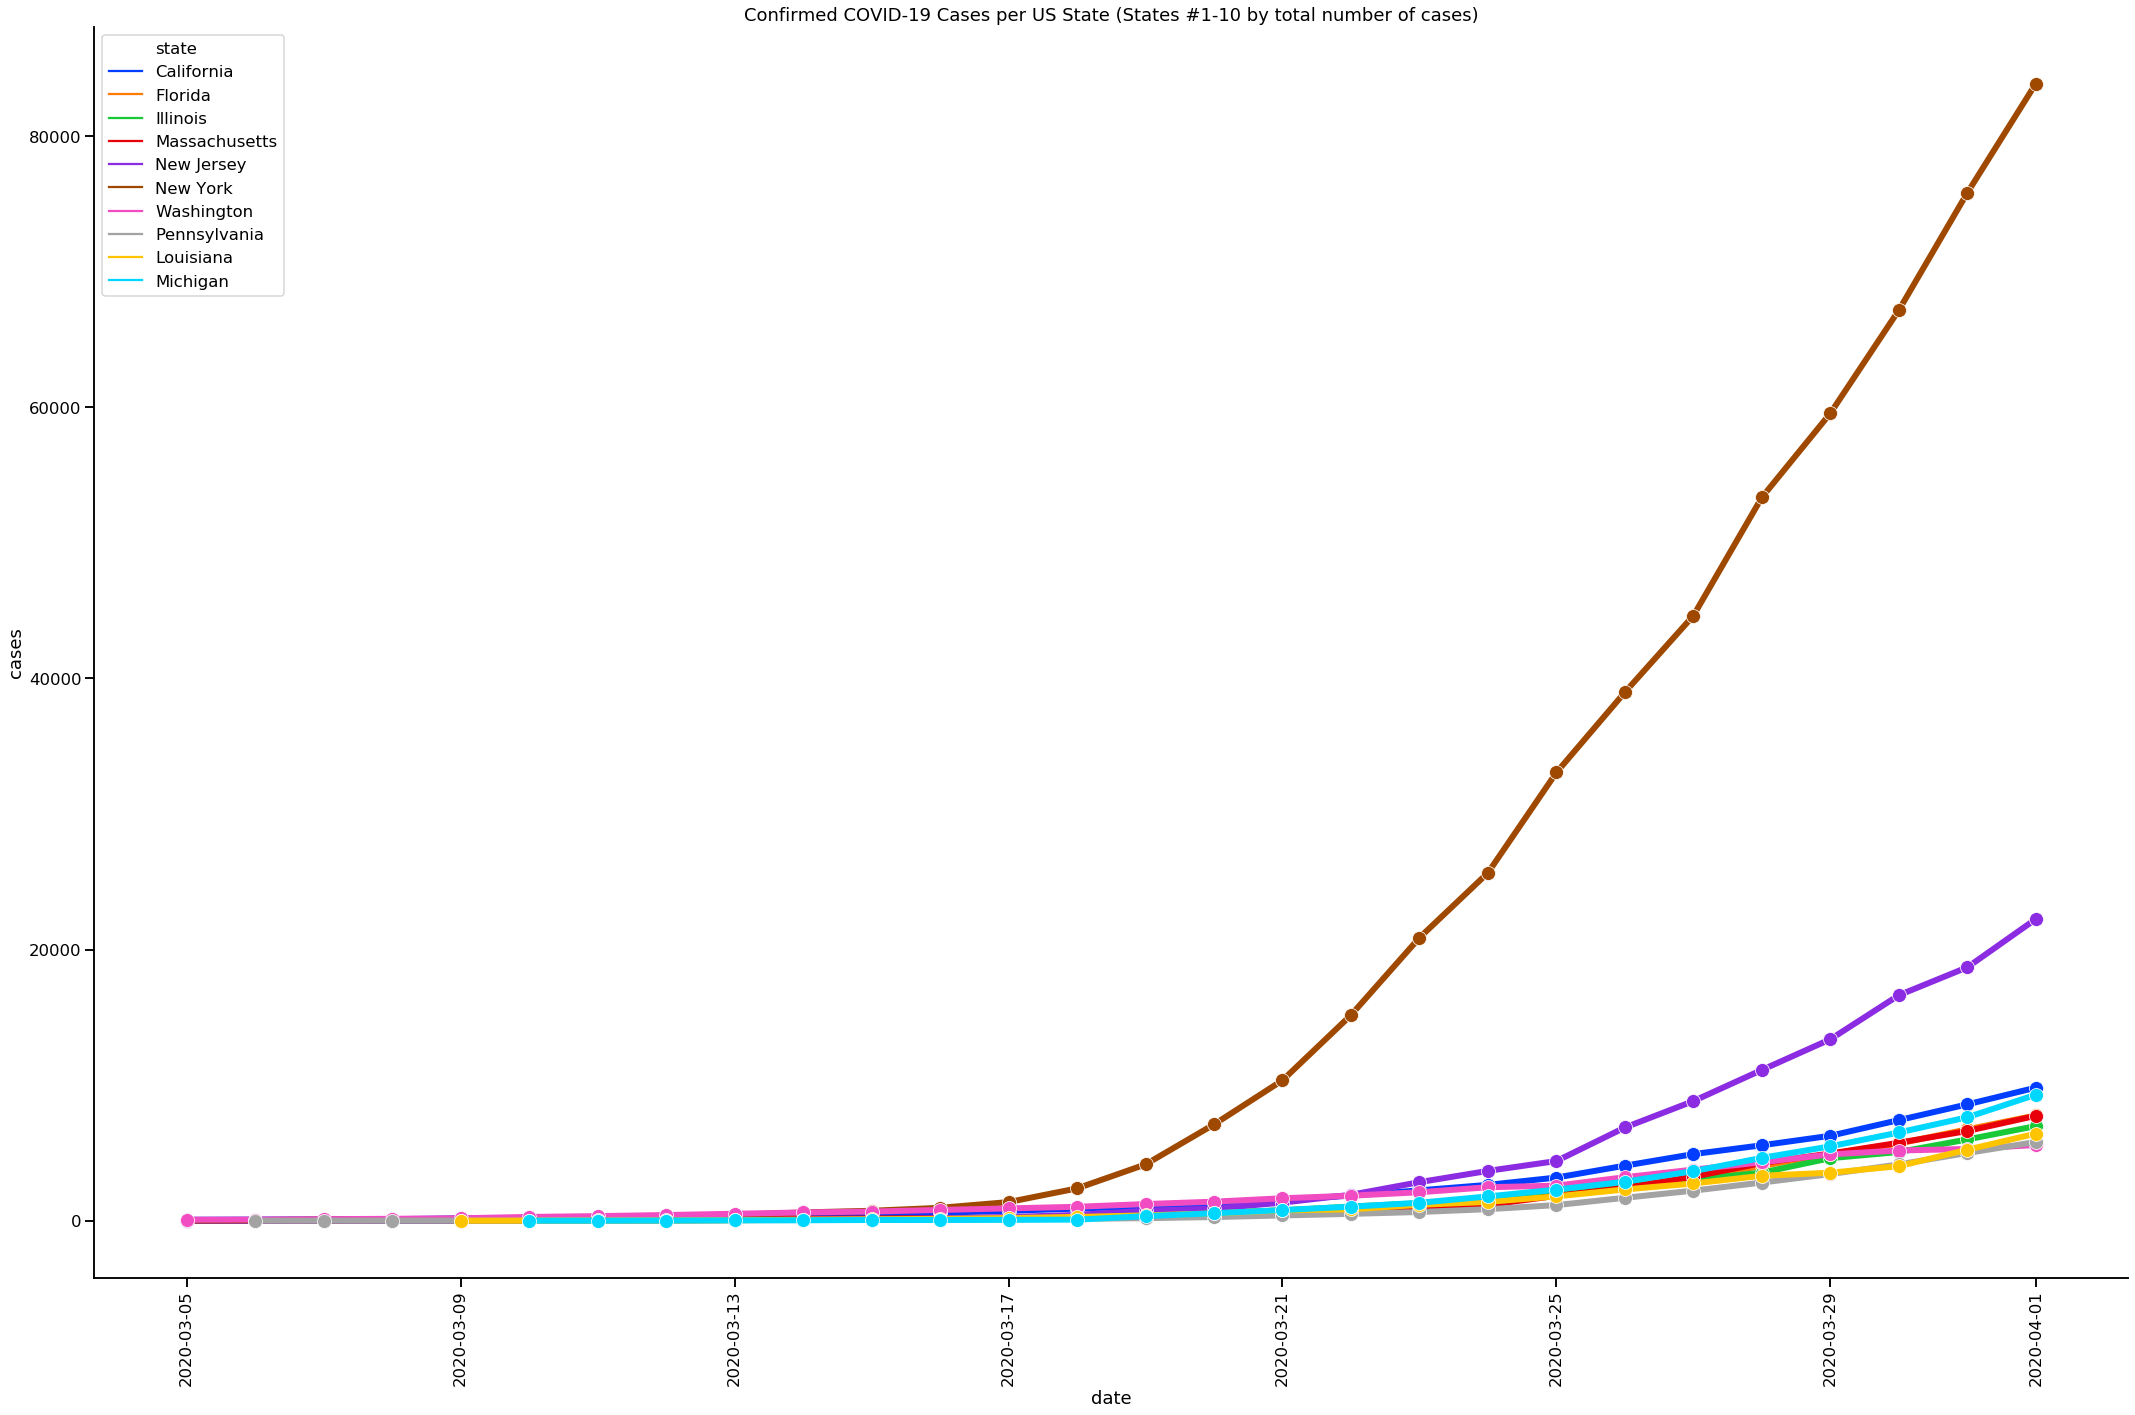

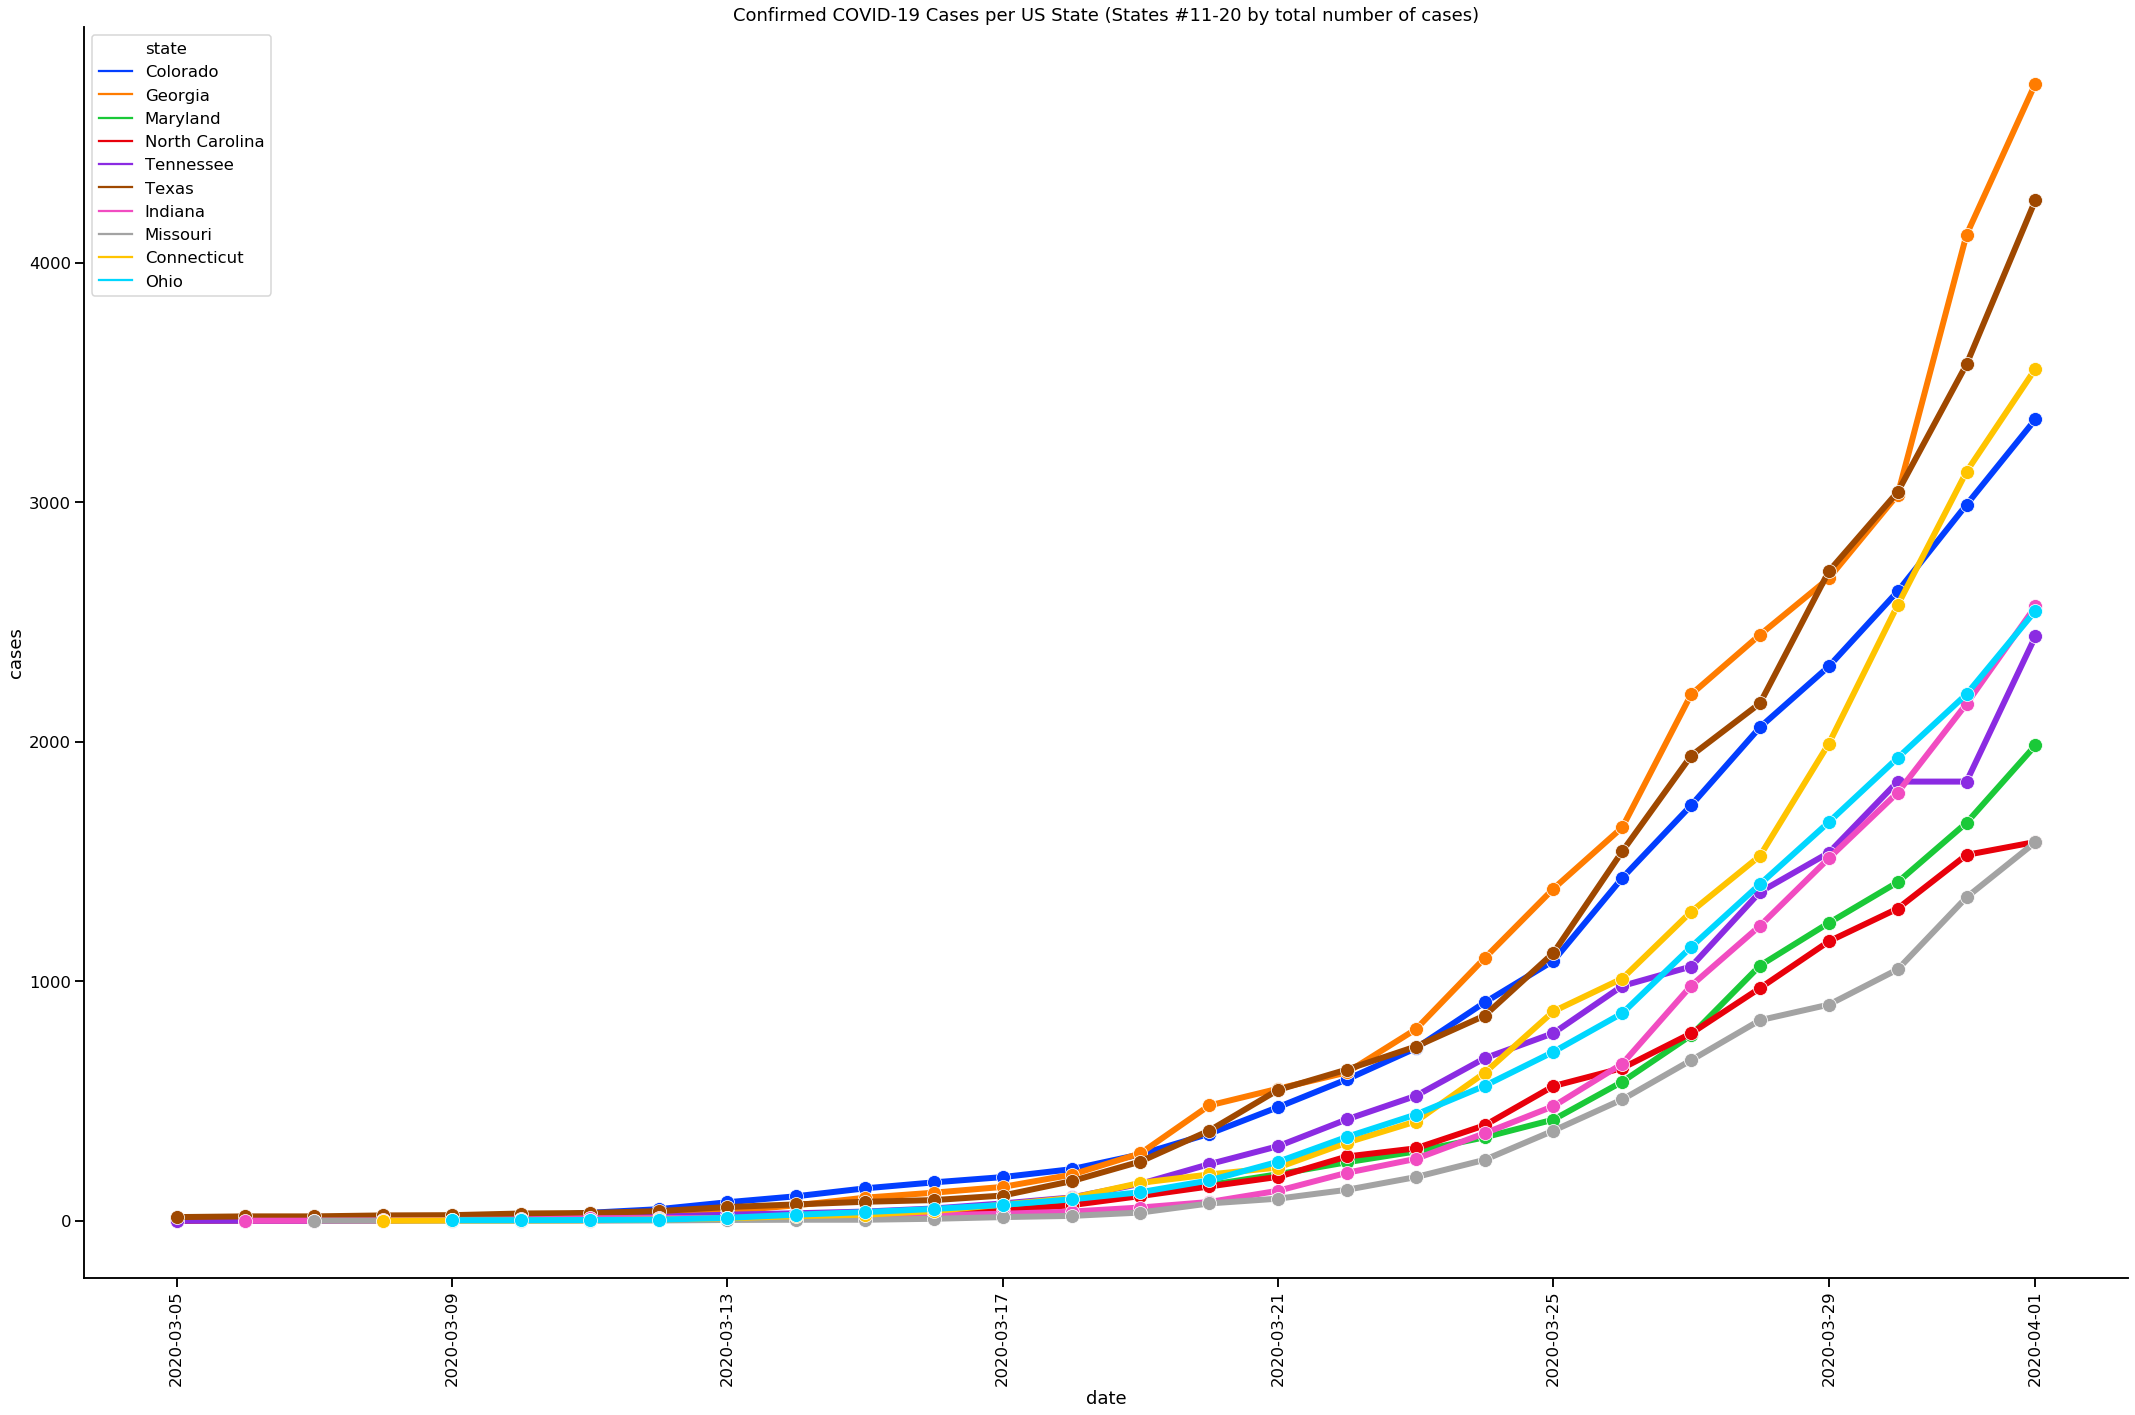

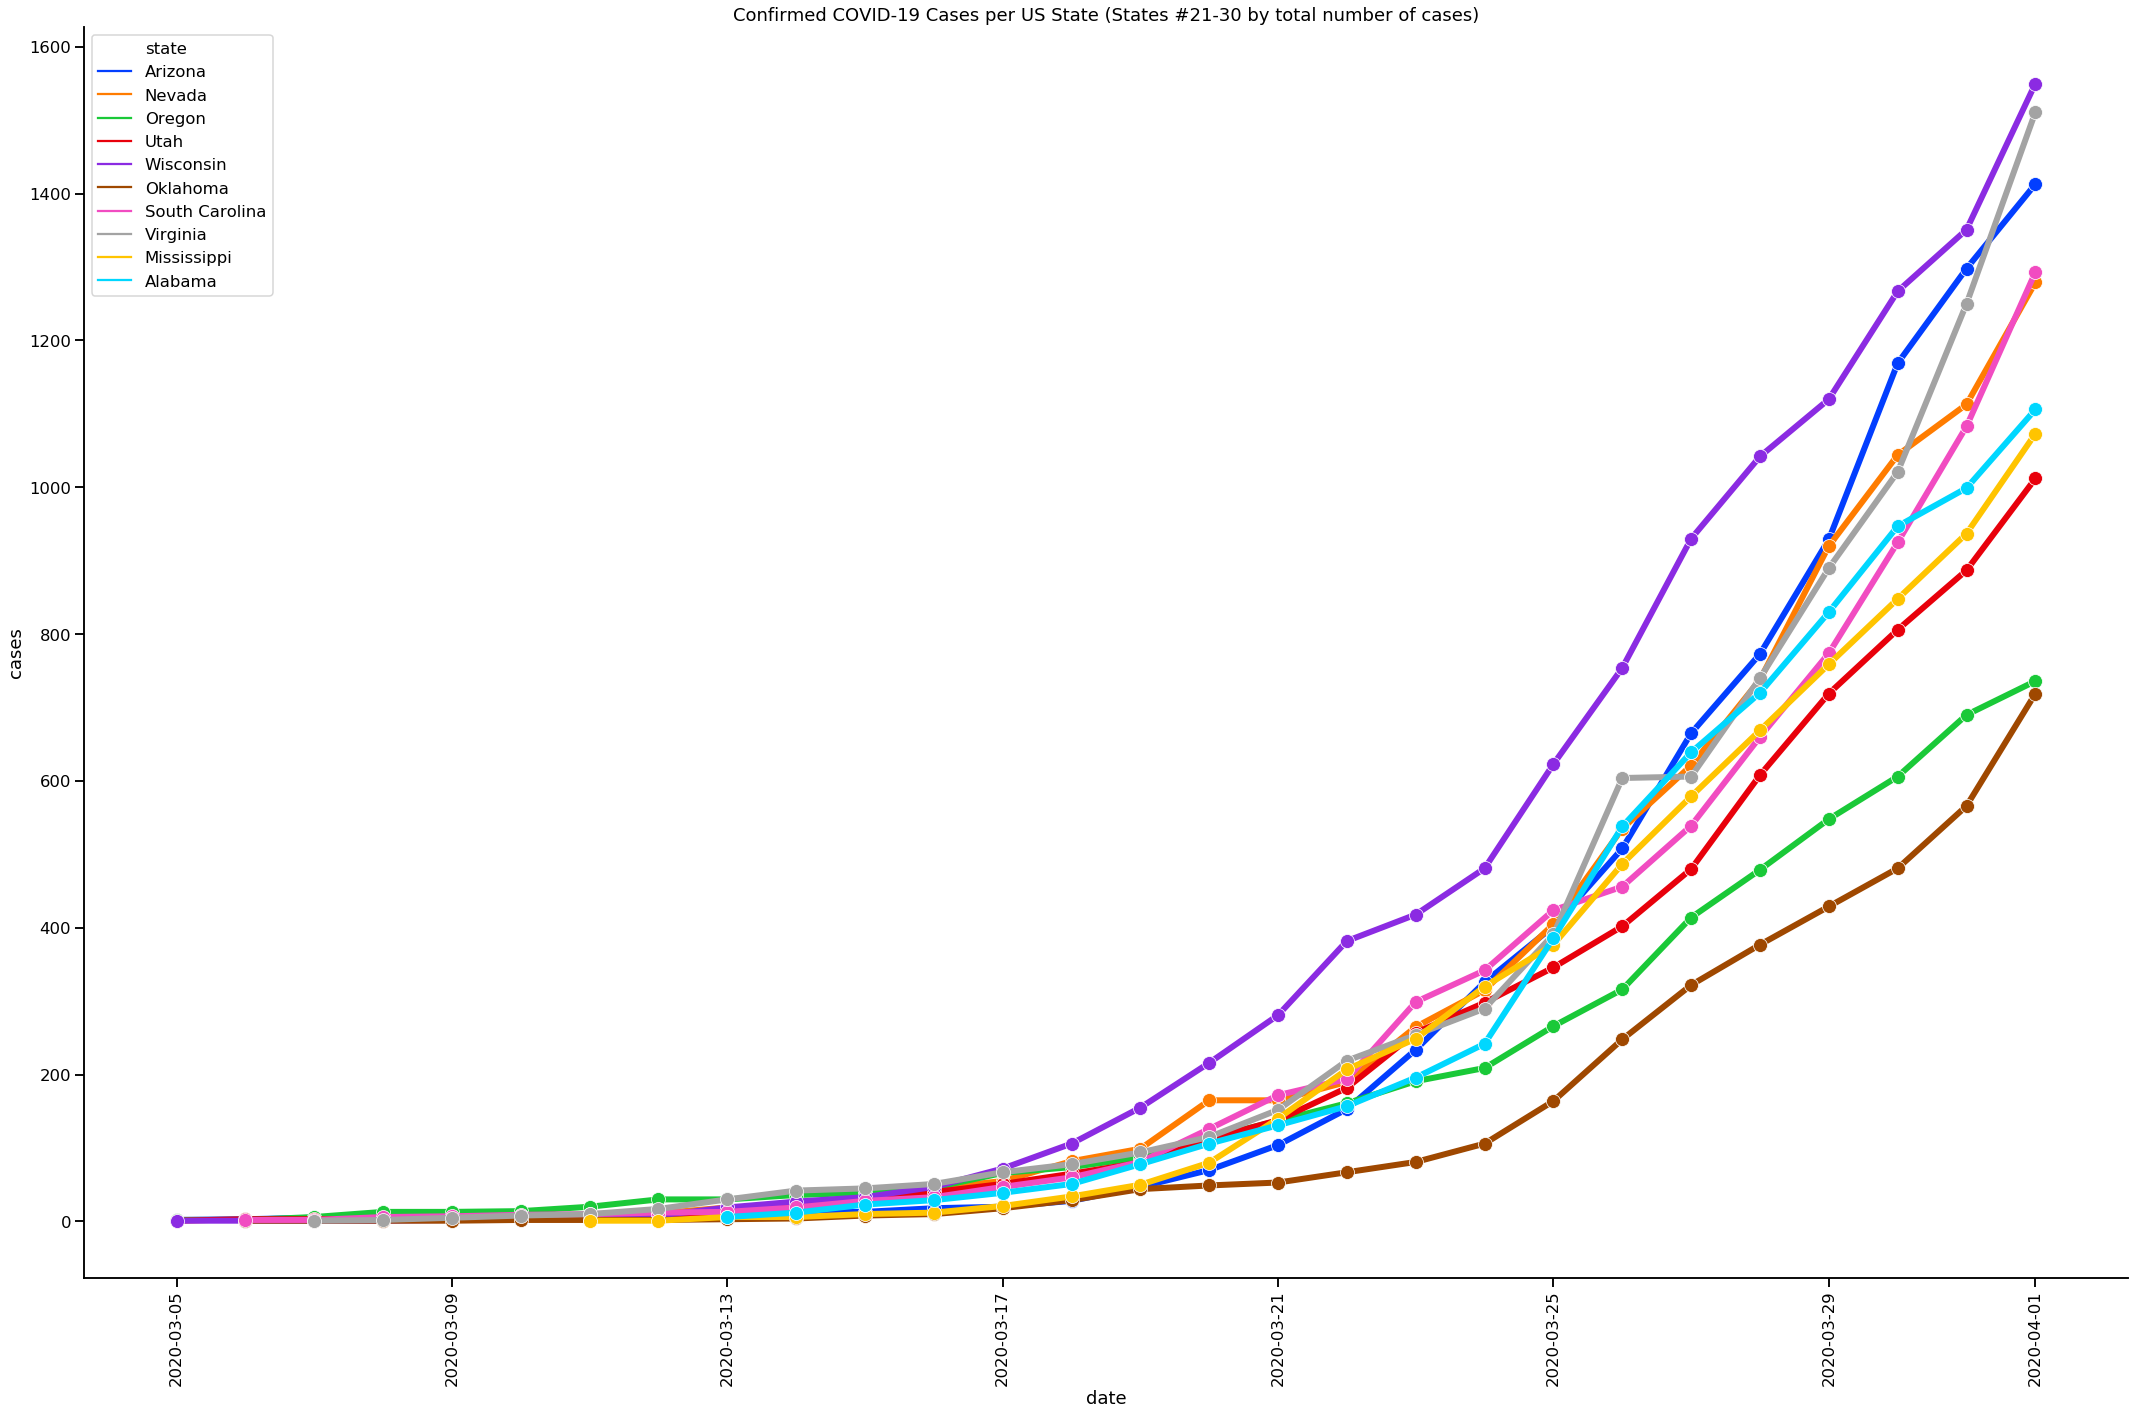

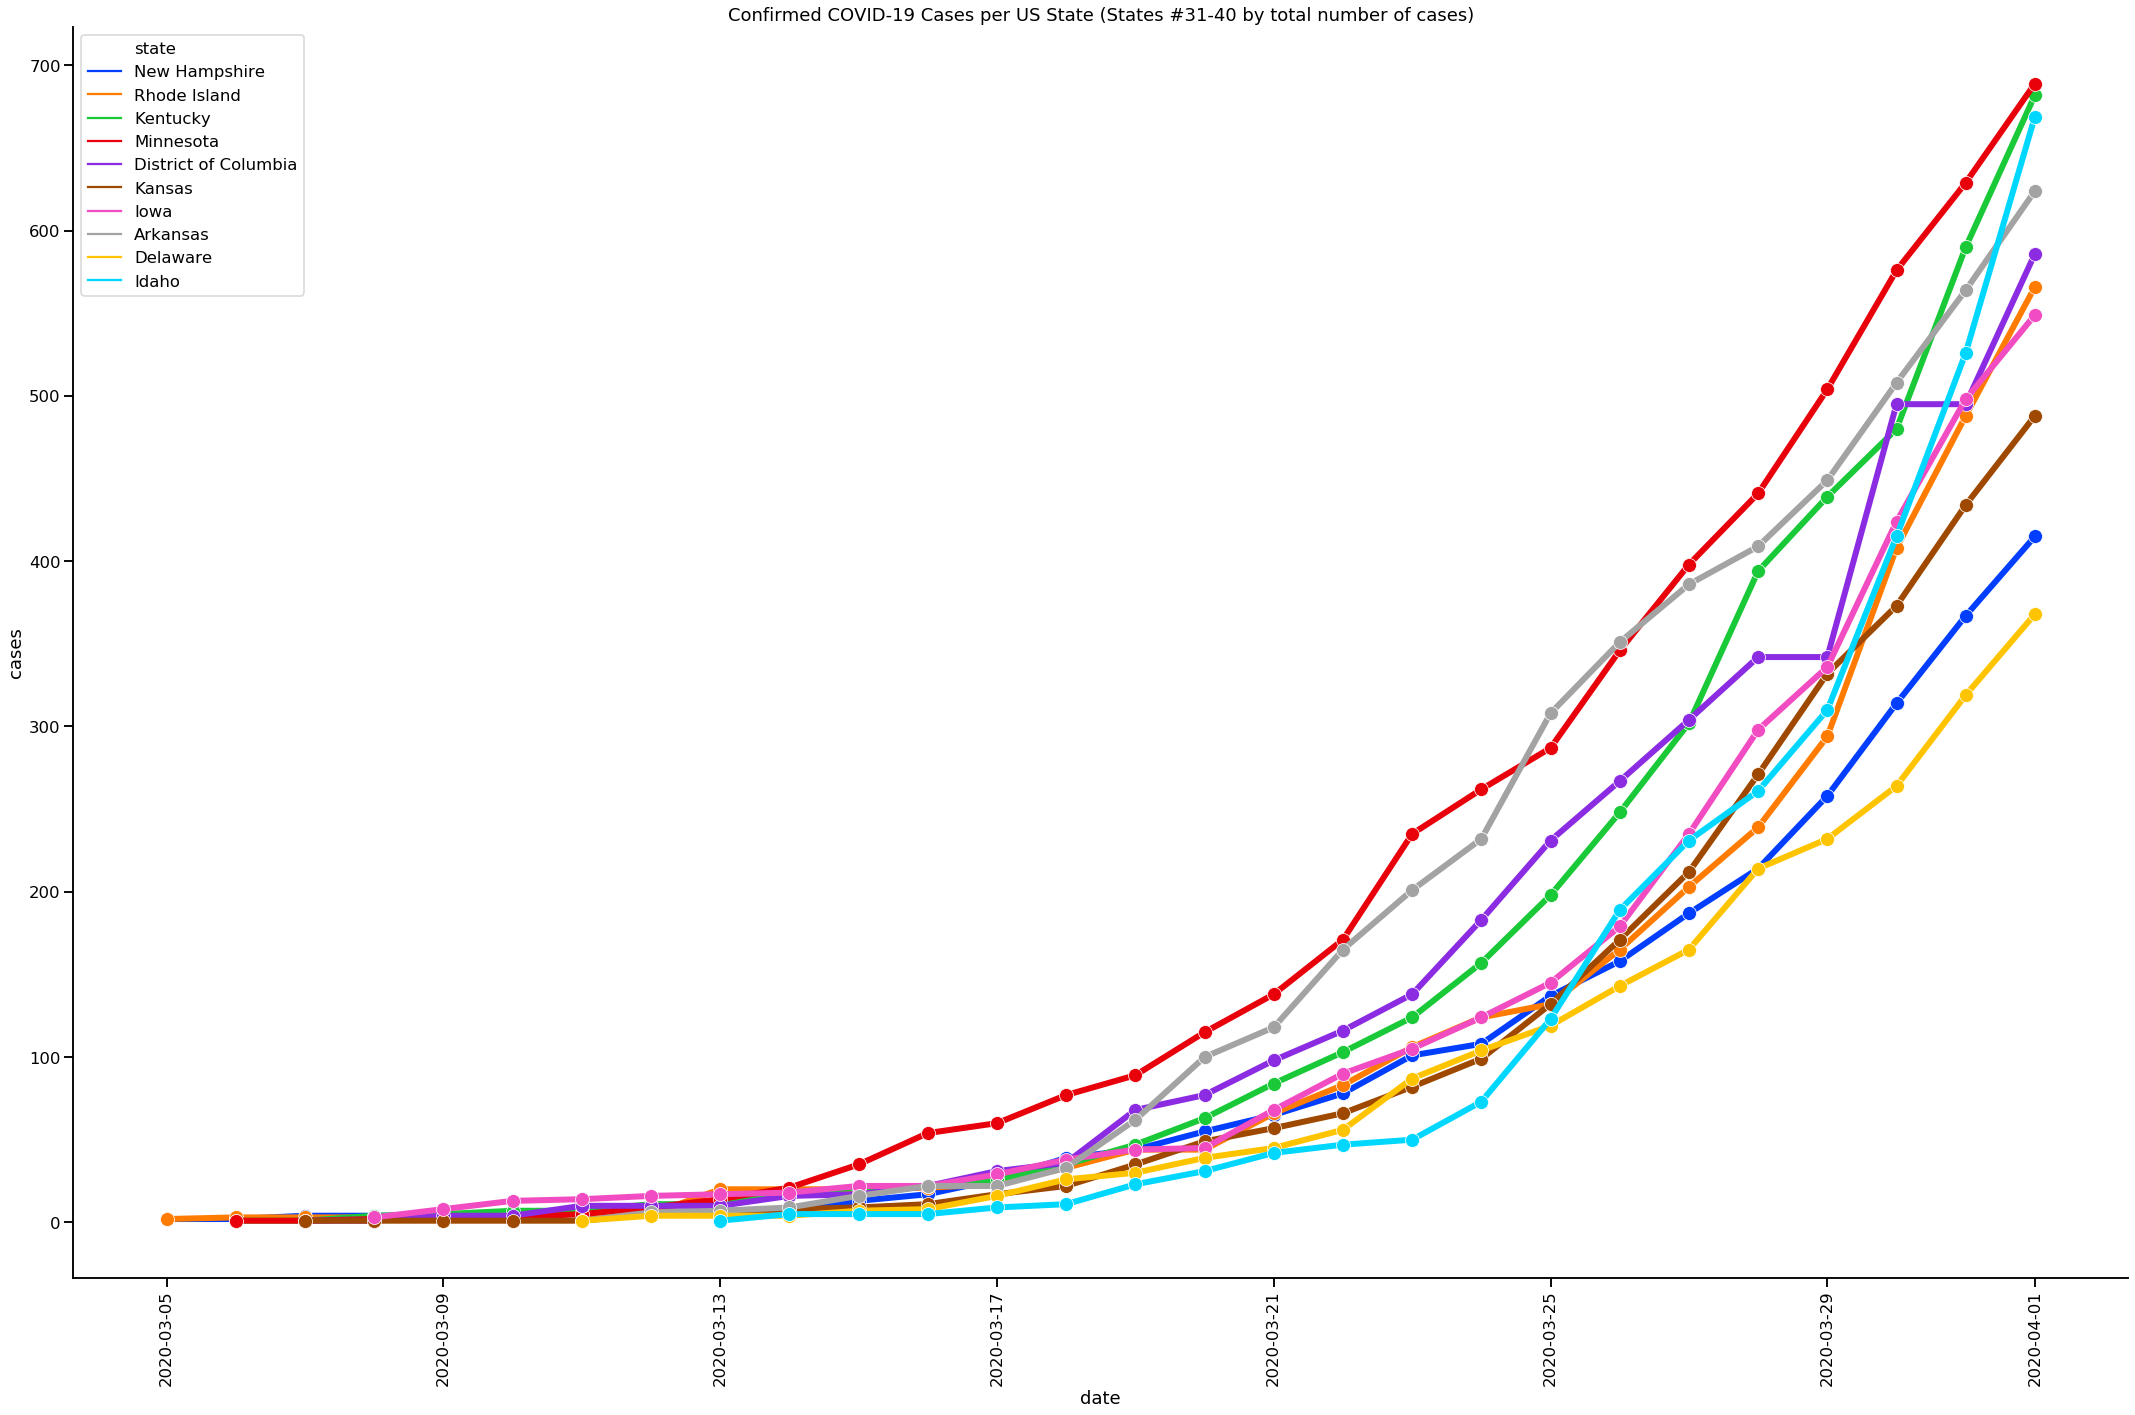

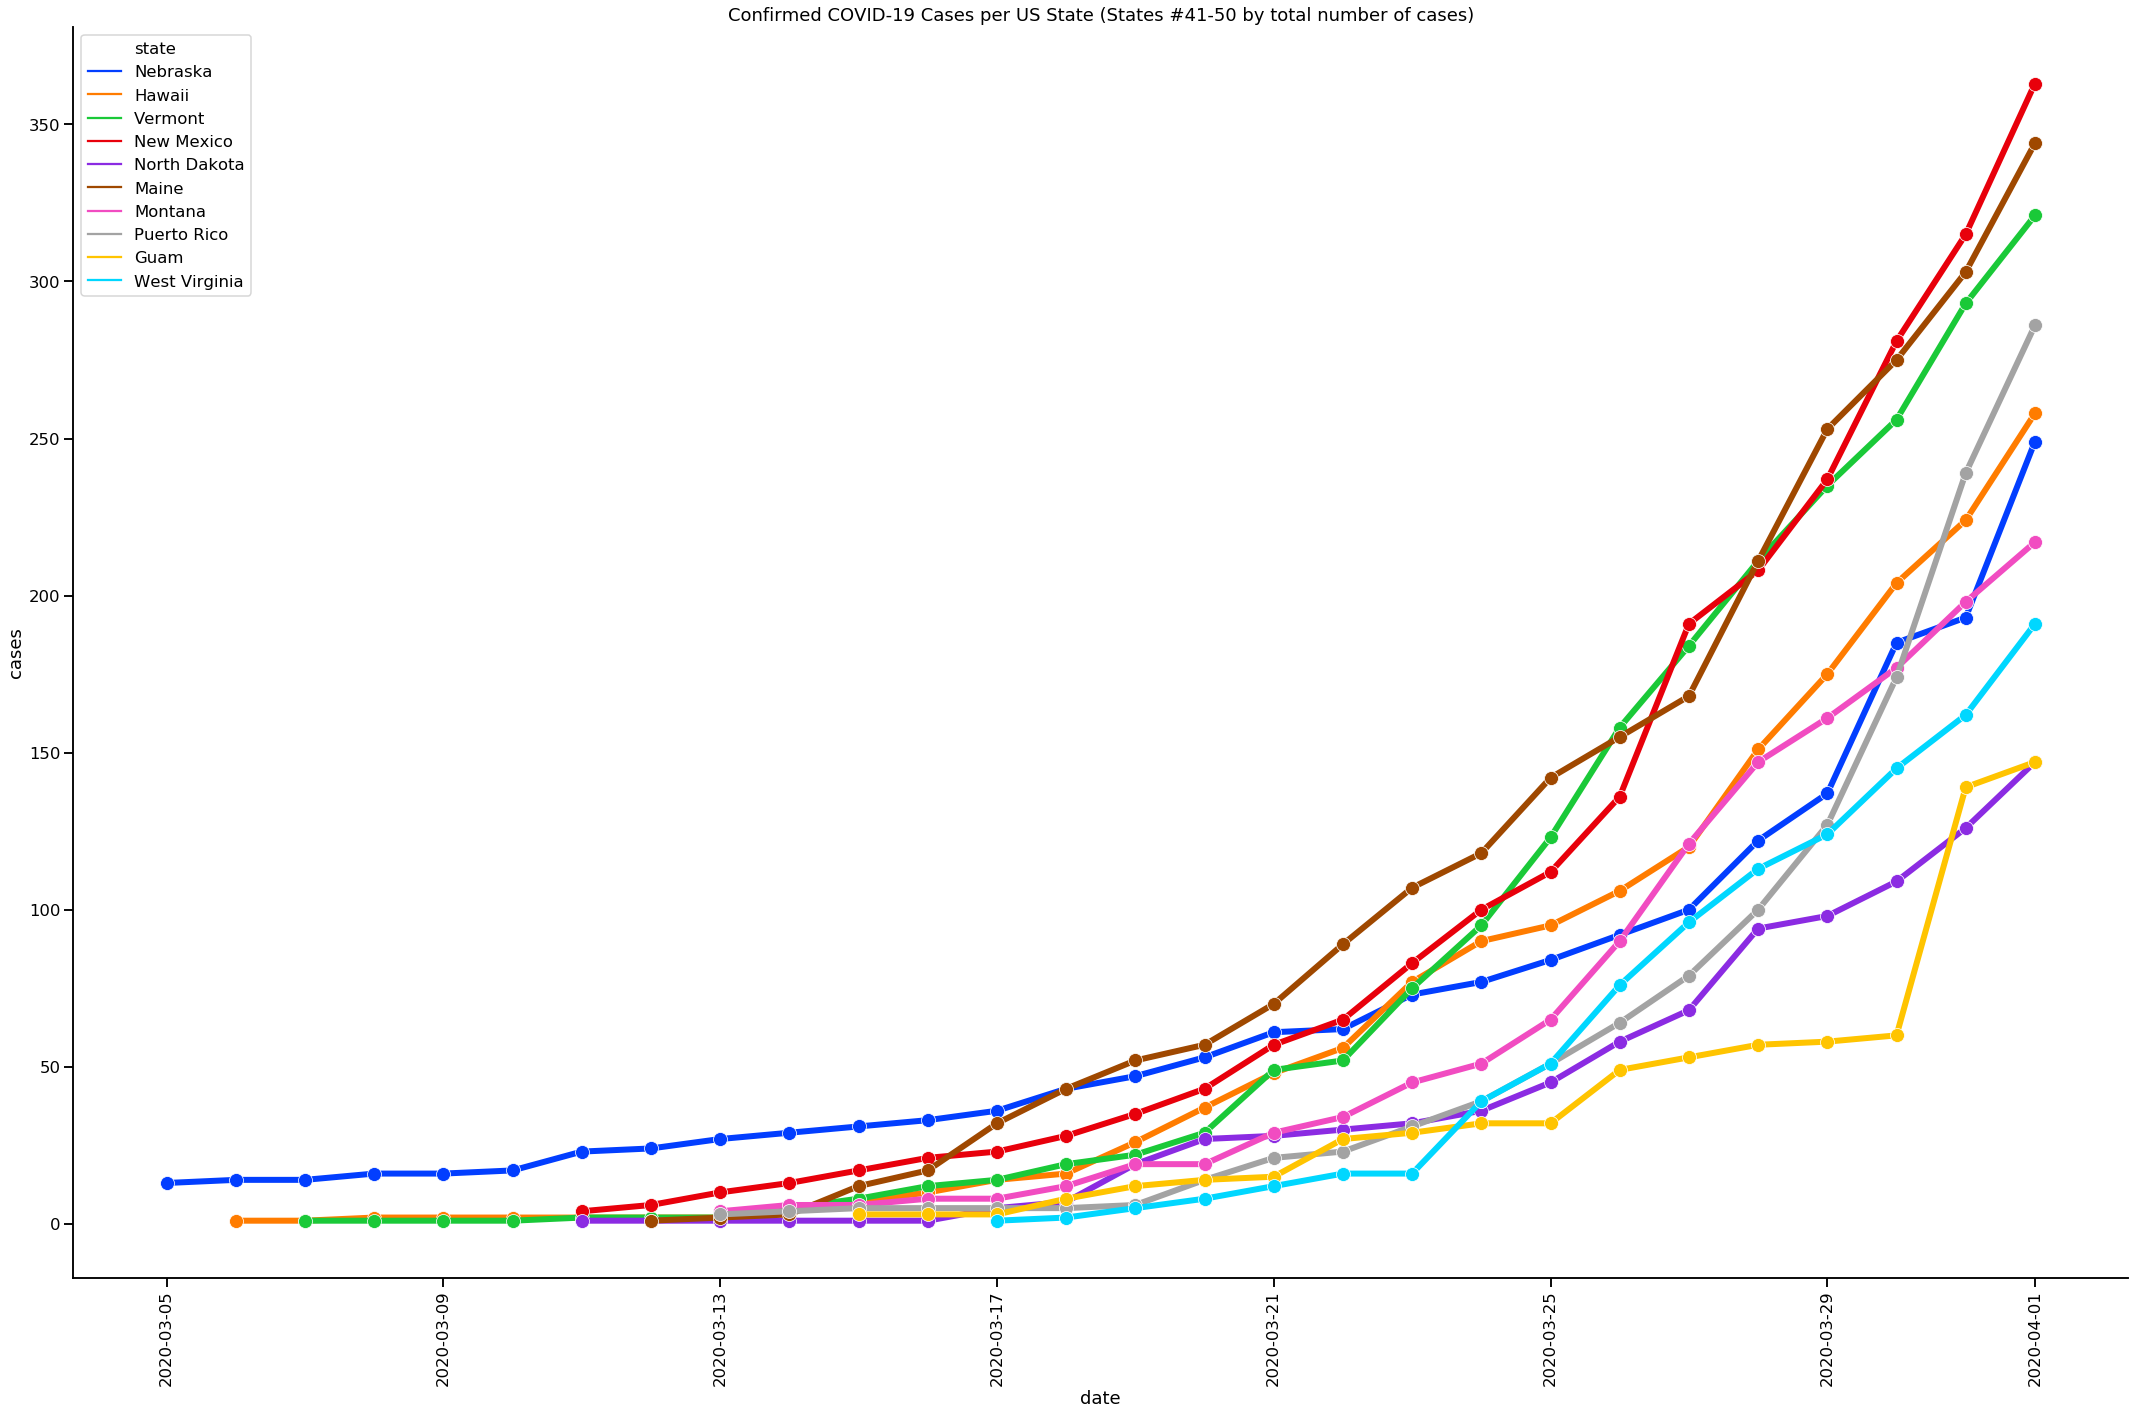

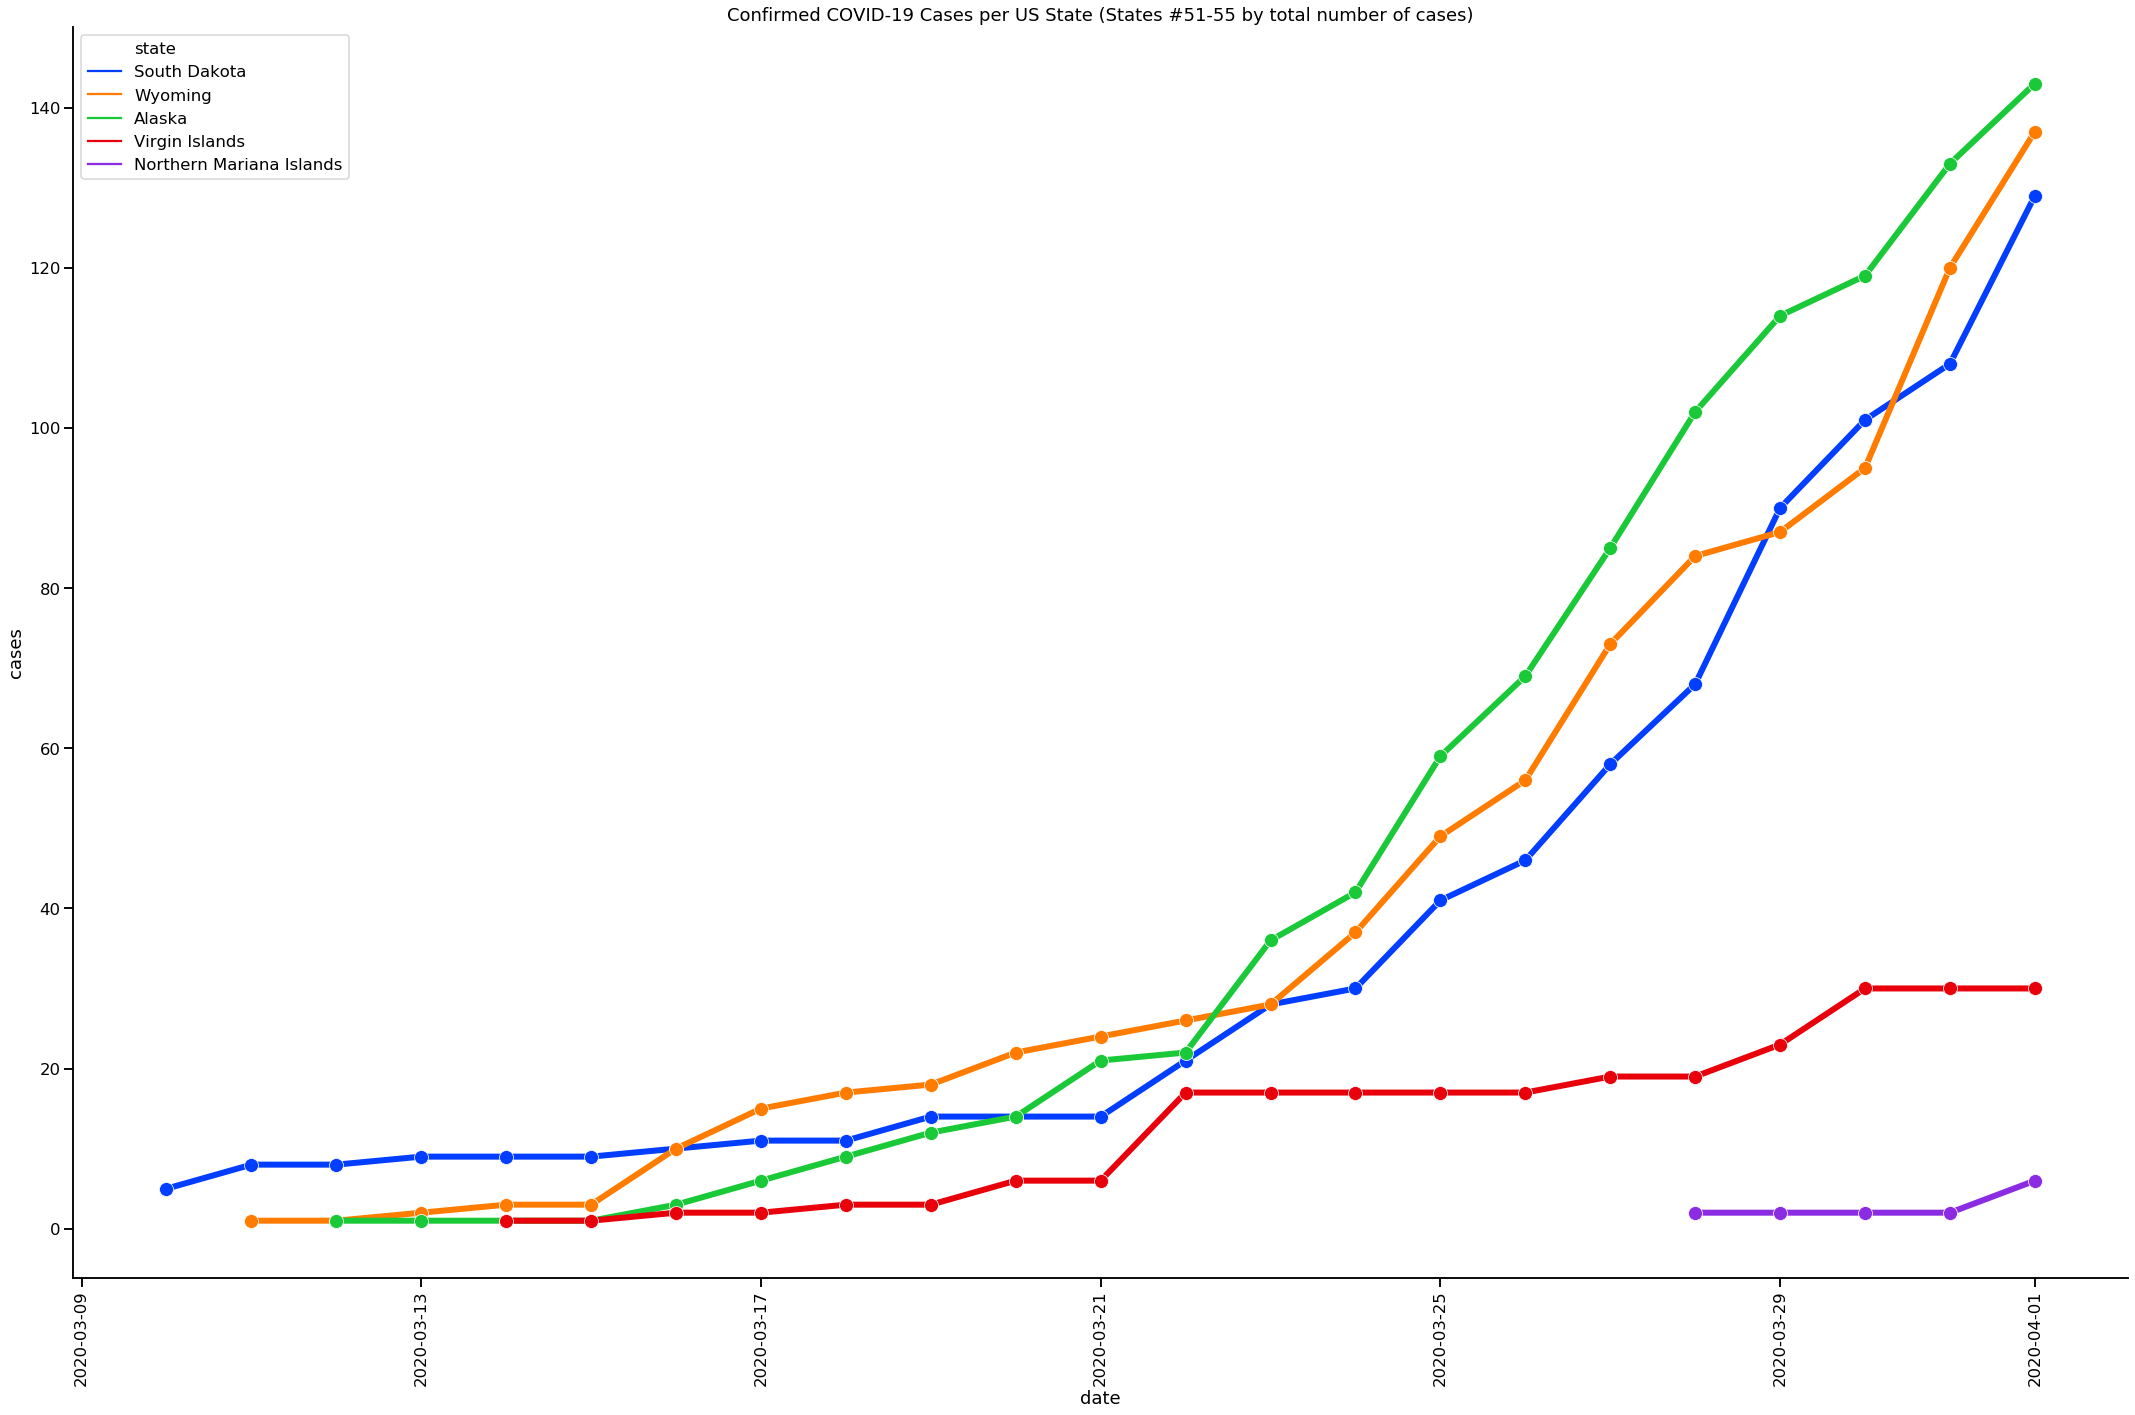

In [27]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)]
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(group)])
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Cases per US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of cases)')
    sns.despine()
    plt.tight_layout()
    plt.show()

In [28]:
states_2_thru_10 = state_groups[0].copy()
states_3_thru_10 = state_groups[0].copy()

del(states_2_thru_10[0])
del(states_3_thru_10[0:2])

print(state_groups[0])
print(states_2_thru_10)
print(states_3_thru_10)

['New York', 'New Jersey', 'California', 'Michigan', 'Florida', 'Massachusetts', 'Illinois', 'Louisiana', 'Pennsylvania', 'Washington']
['New Jersey', 'California', 'Michigan', 'Florida', 'Massachusetts', 'Illinois', 'Louisiana', 'Pennsylvania', 'Washington']
['California', 'Michigan', 'Florida', 'Massachusetts', 'Illinois', 'Louisiana', 'Pennsylvania', 'Washington']


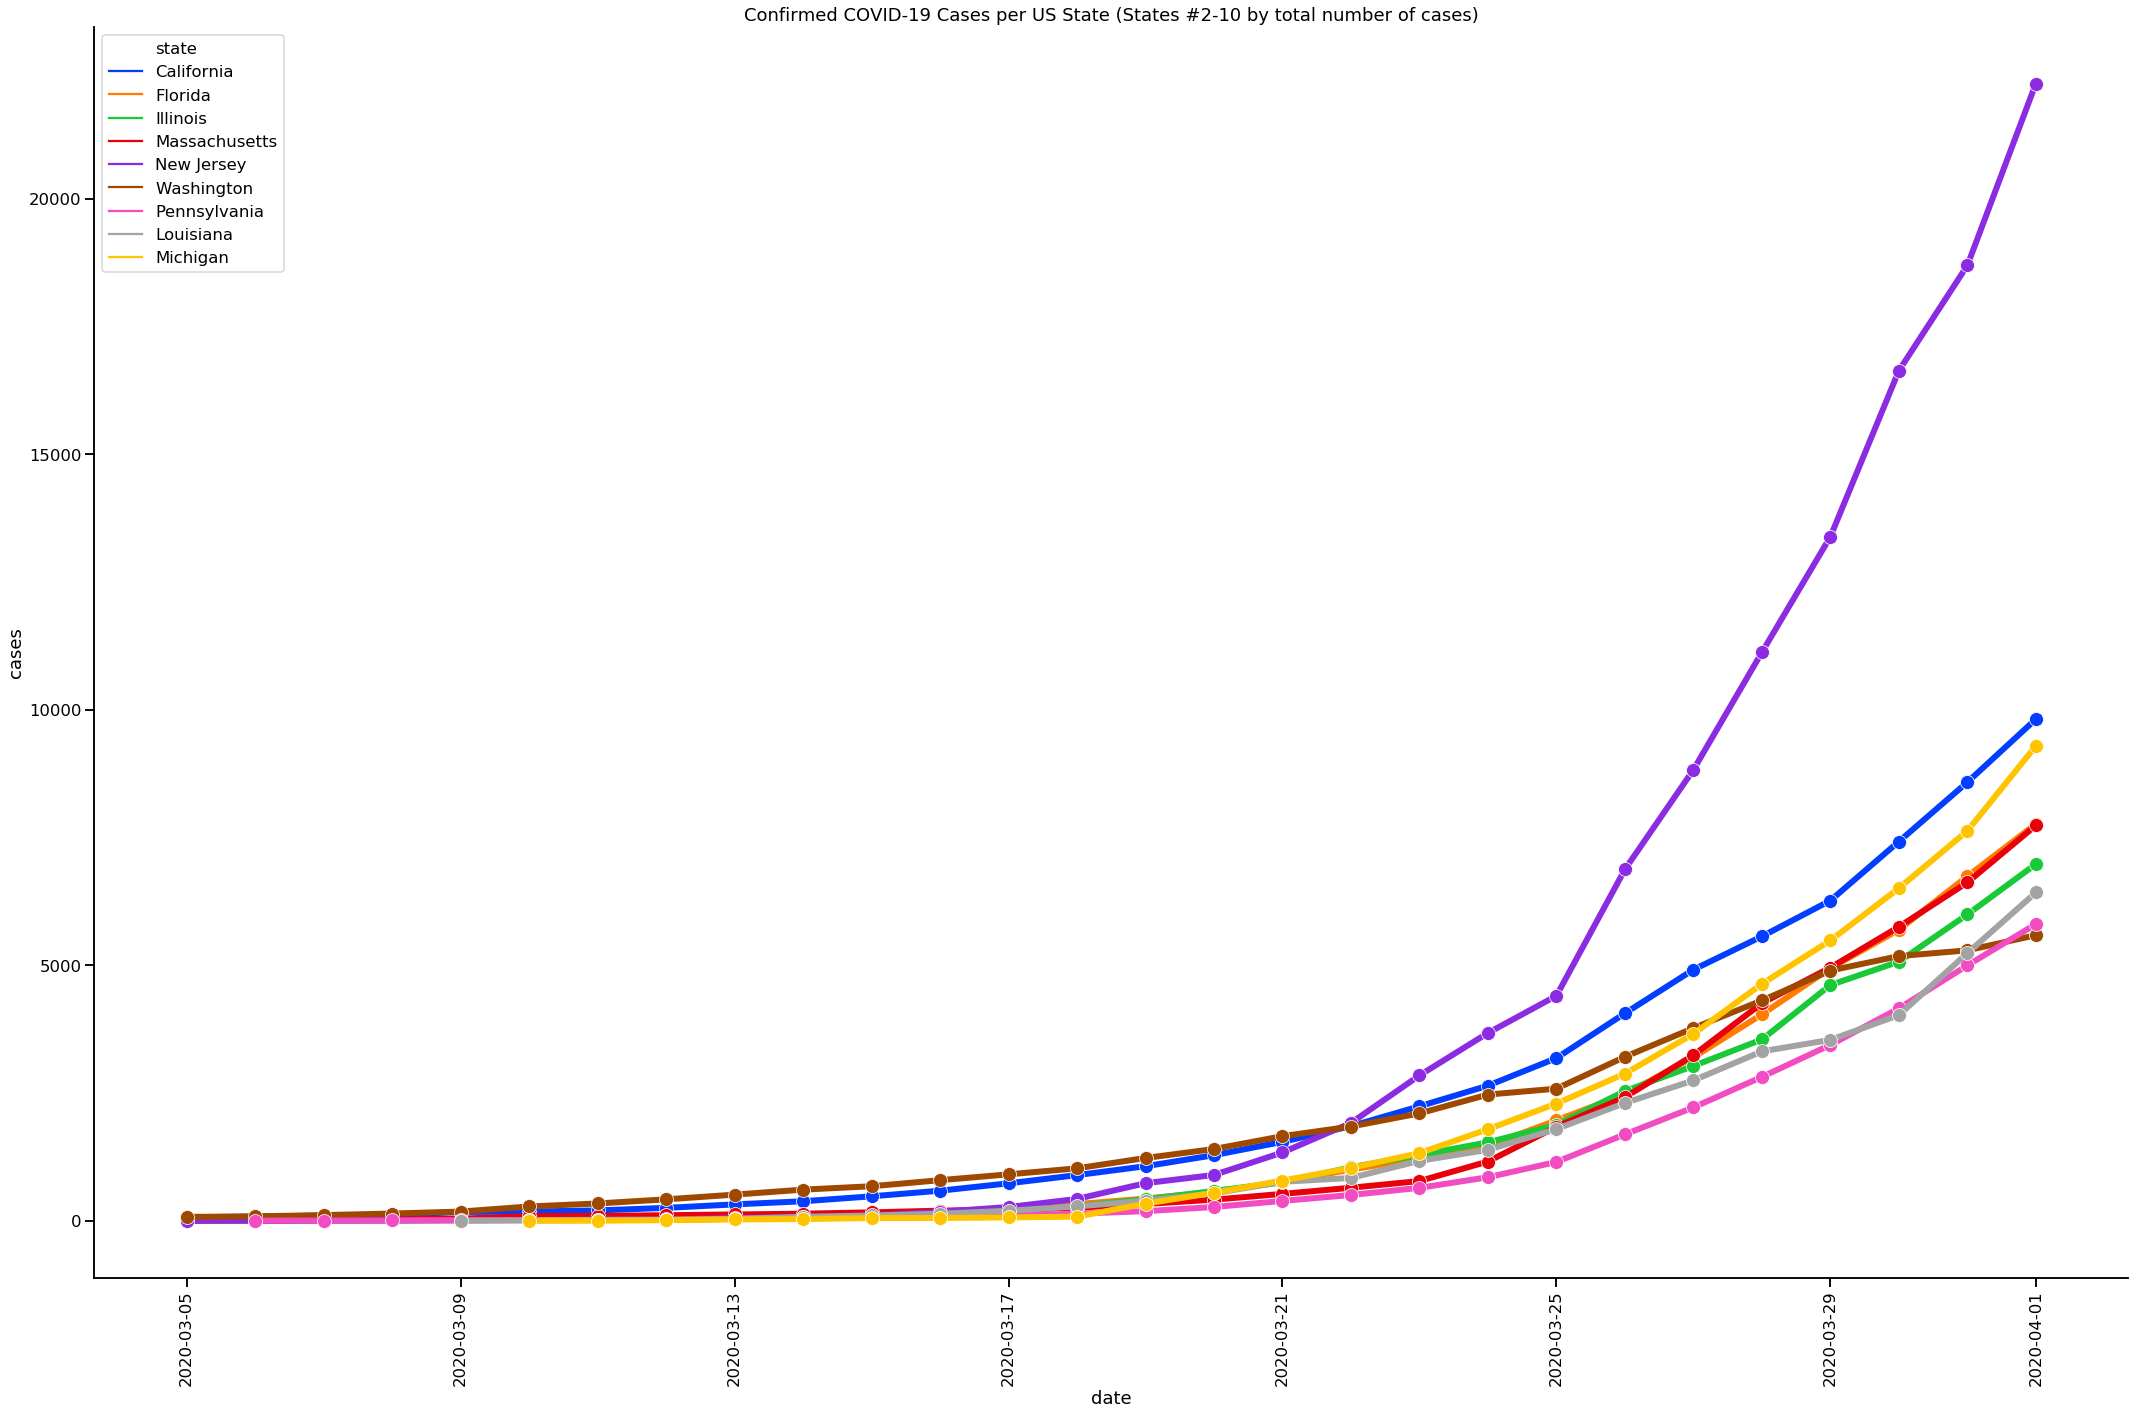

In [29]:
states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_2_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per US State (States #2-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()

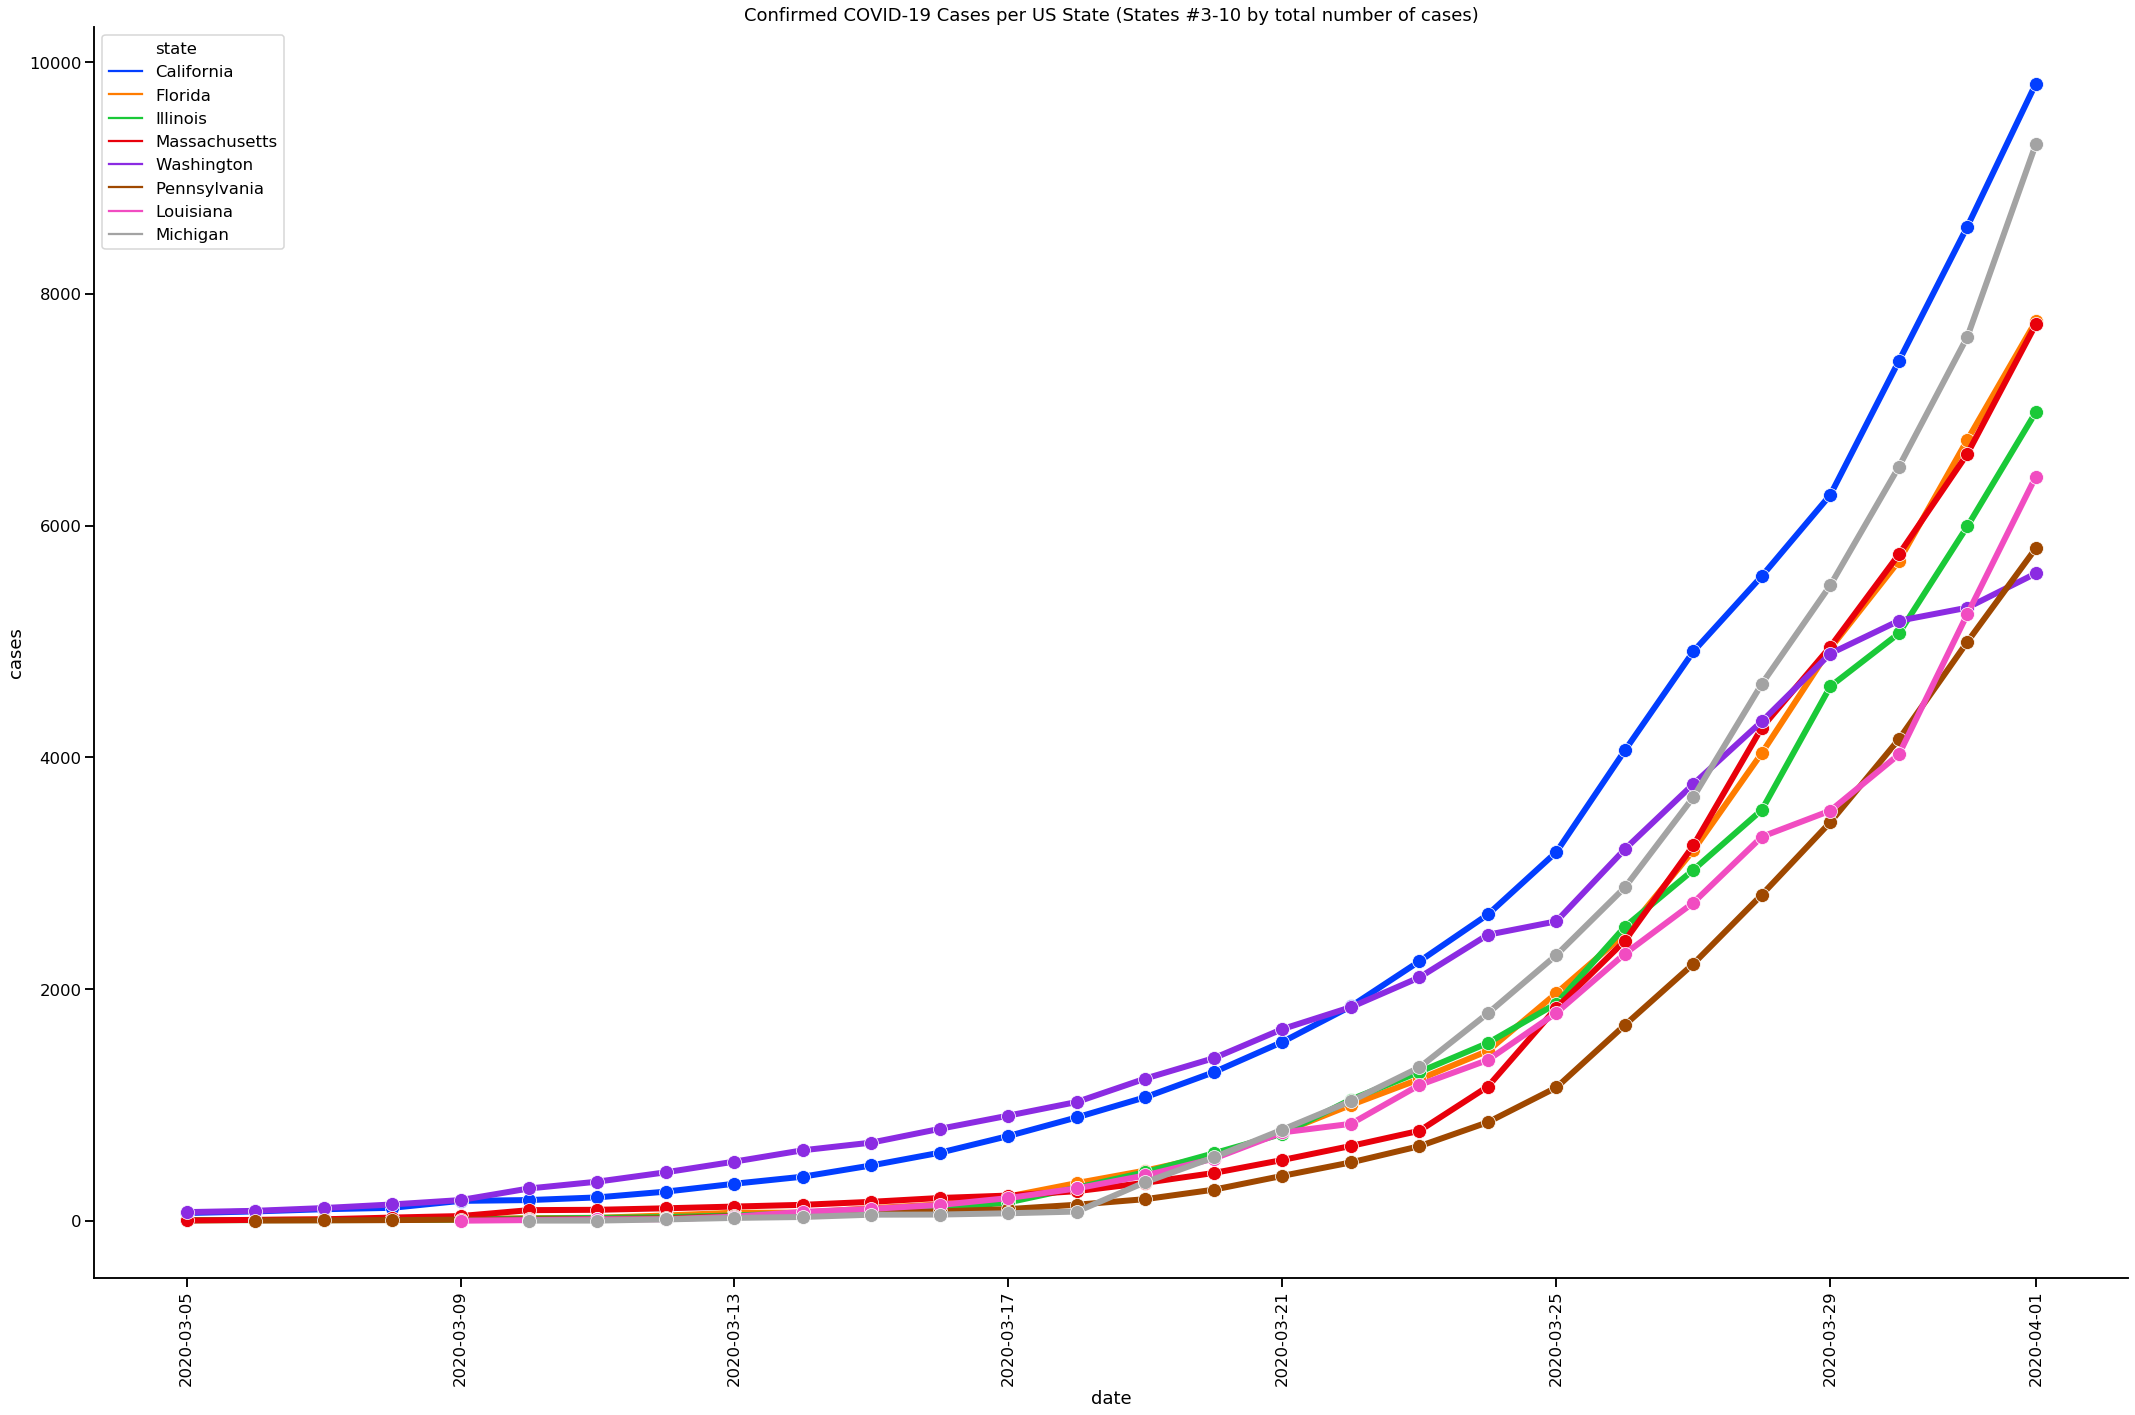

In [30]:
states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_3_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per US State (States #3-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()

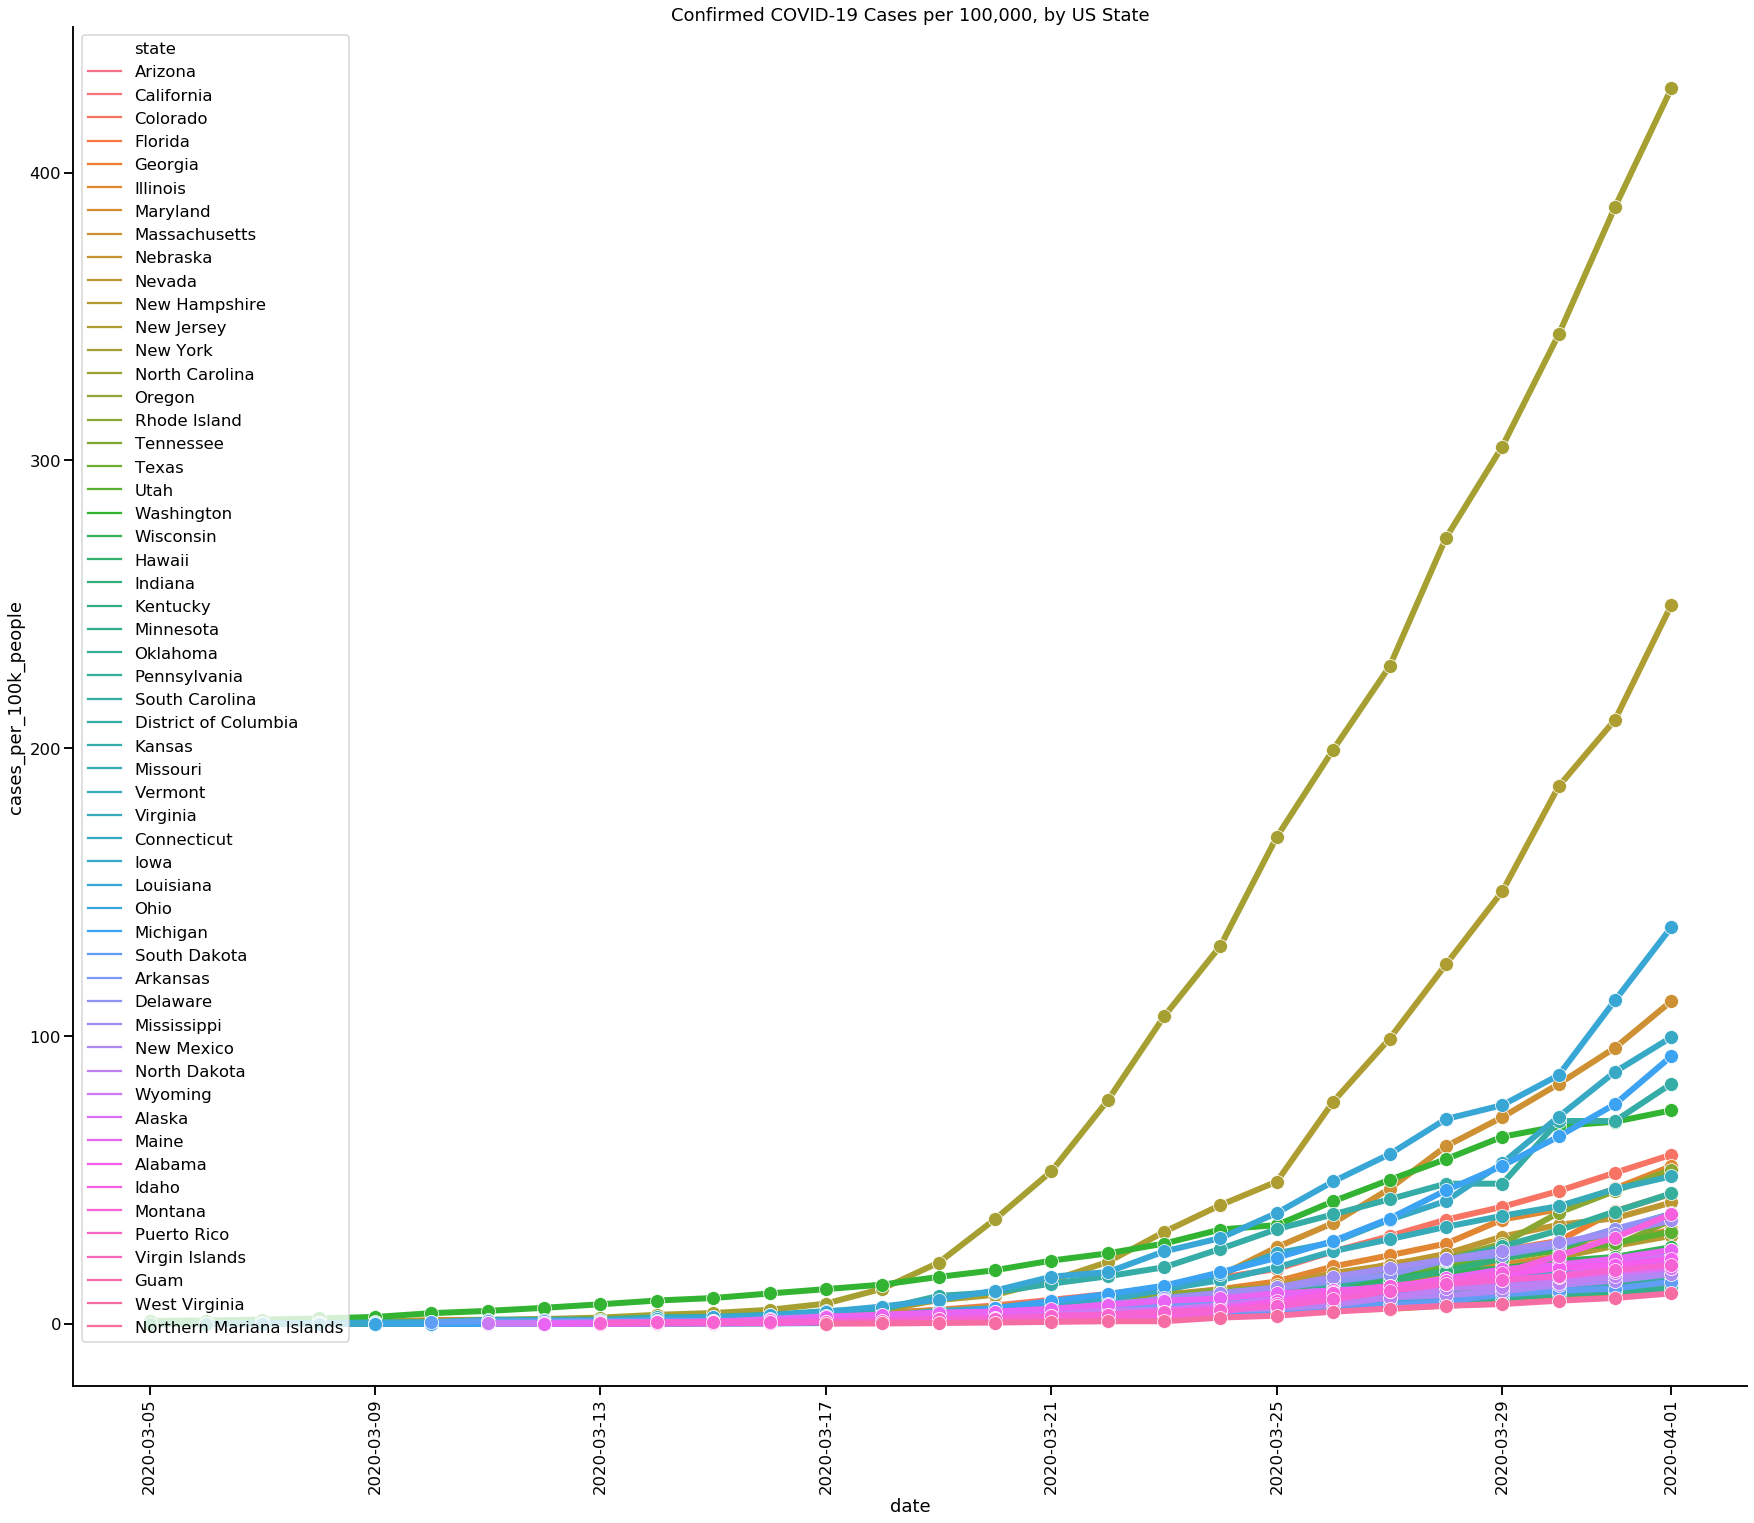

In [31]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['cases_per_100k_people'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Cases per 100,000, by US State')
plt.xticks(rotation=90);
sns.despine()

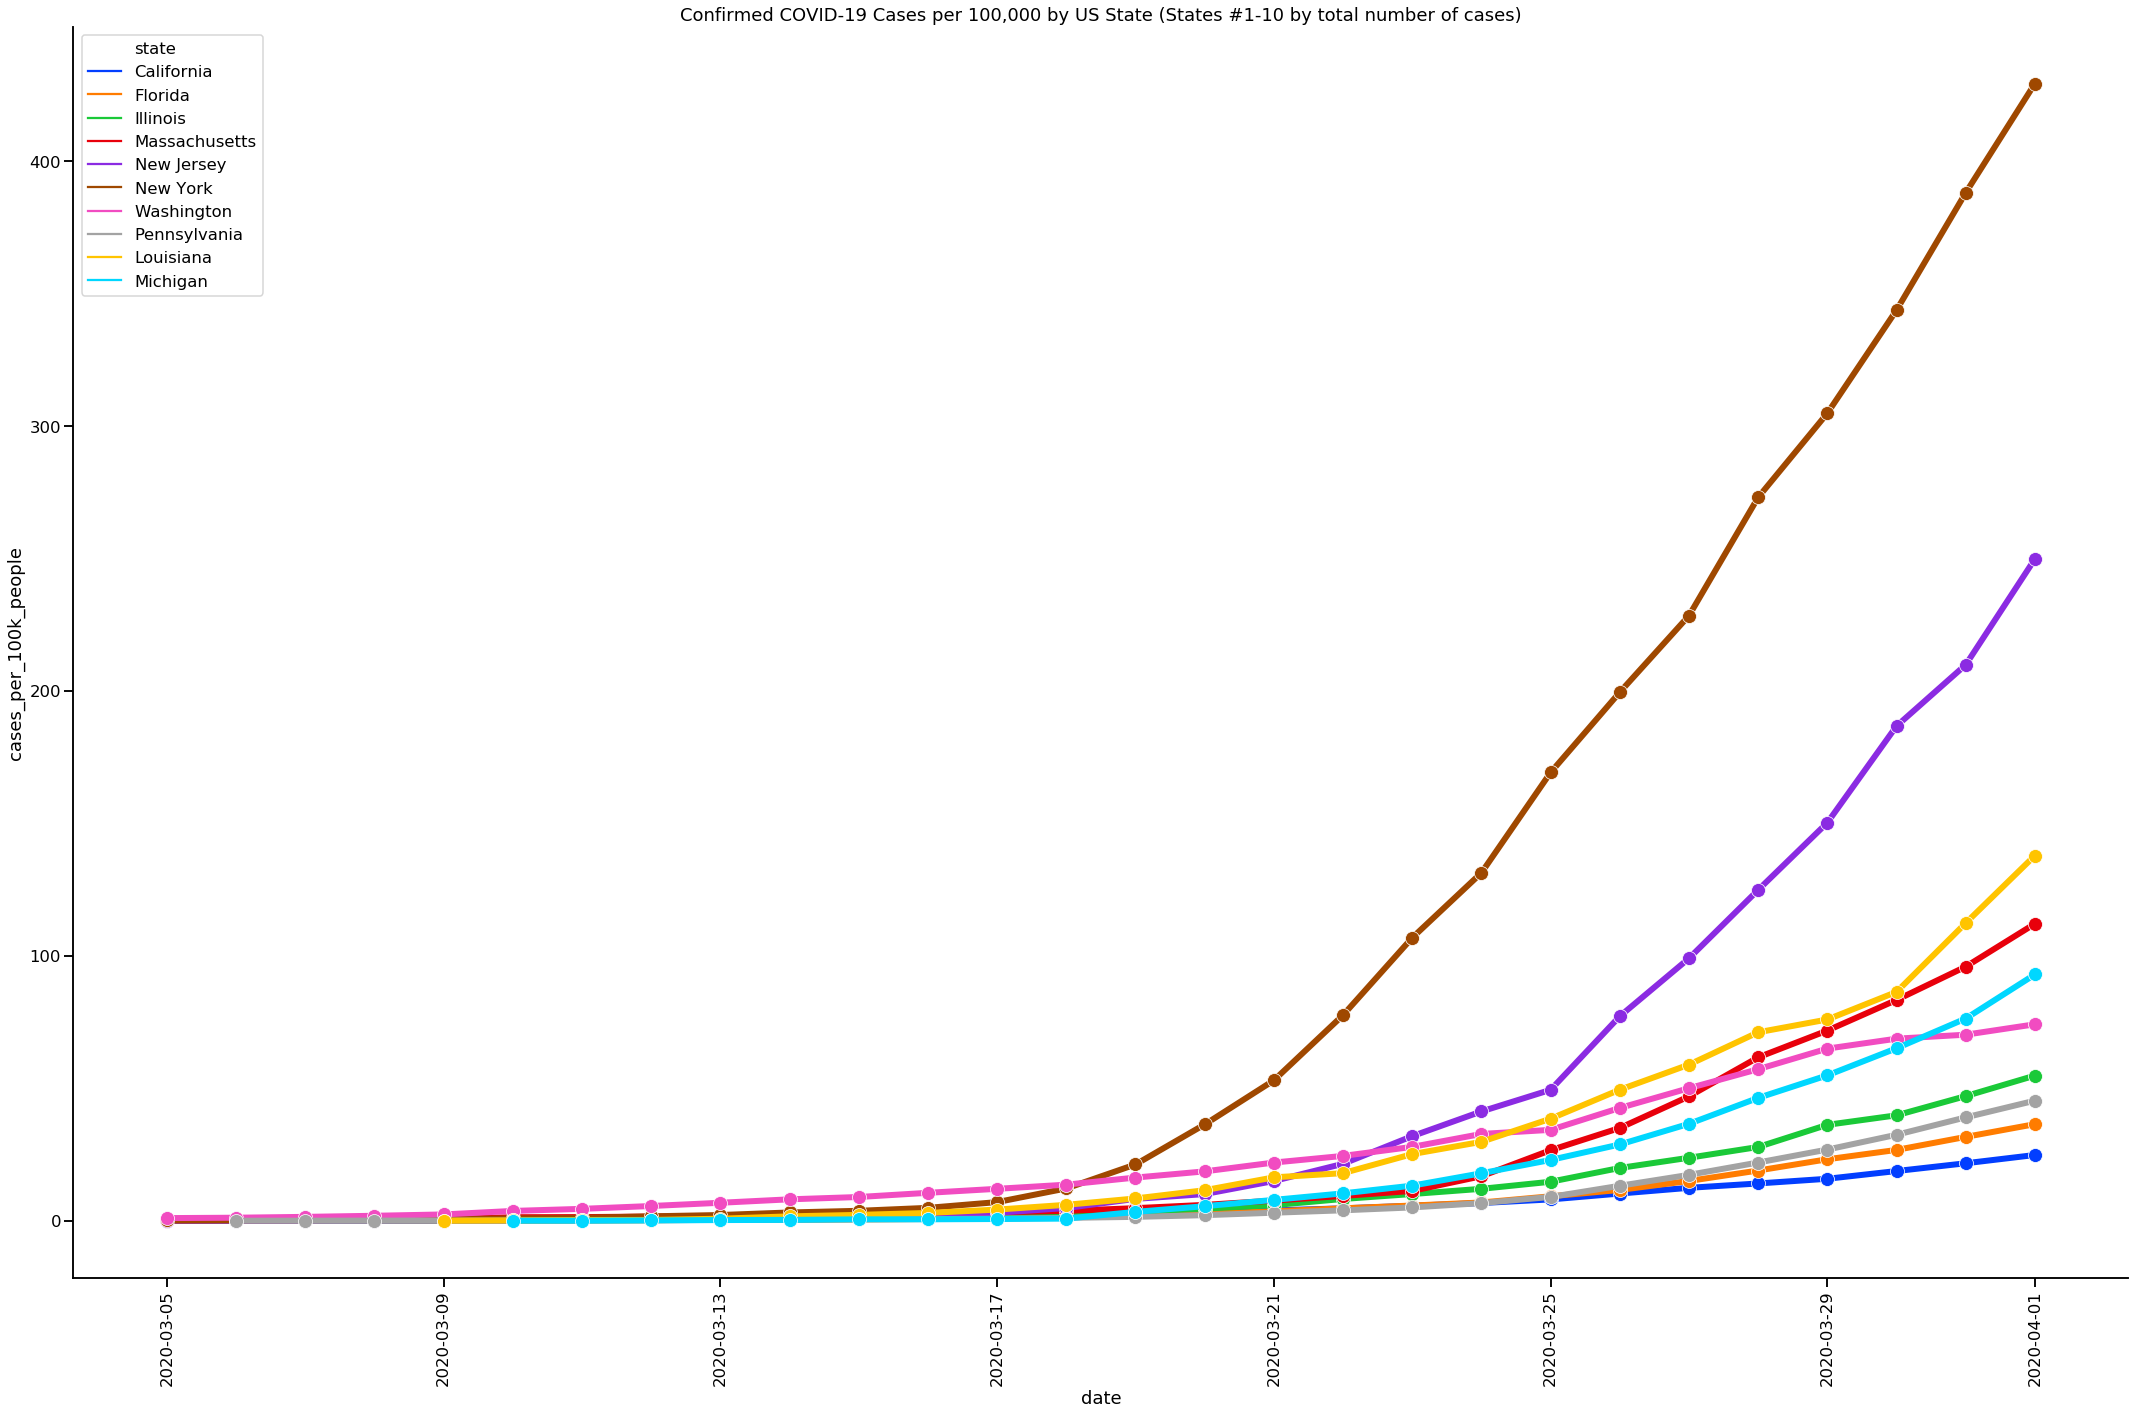

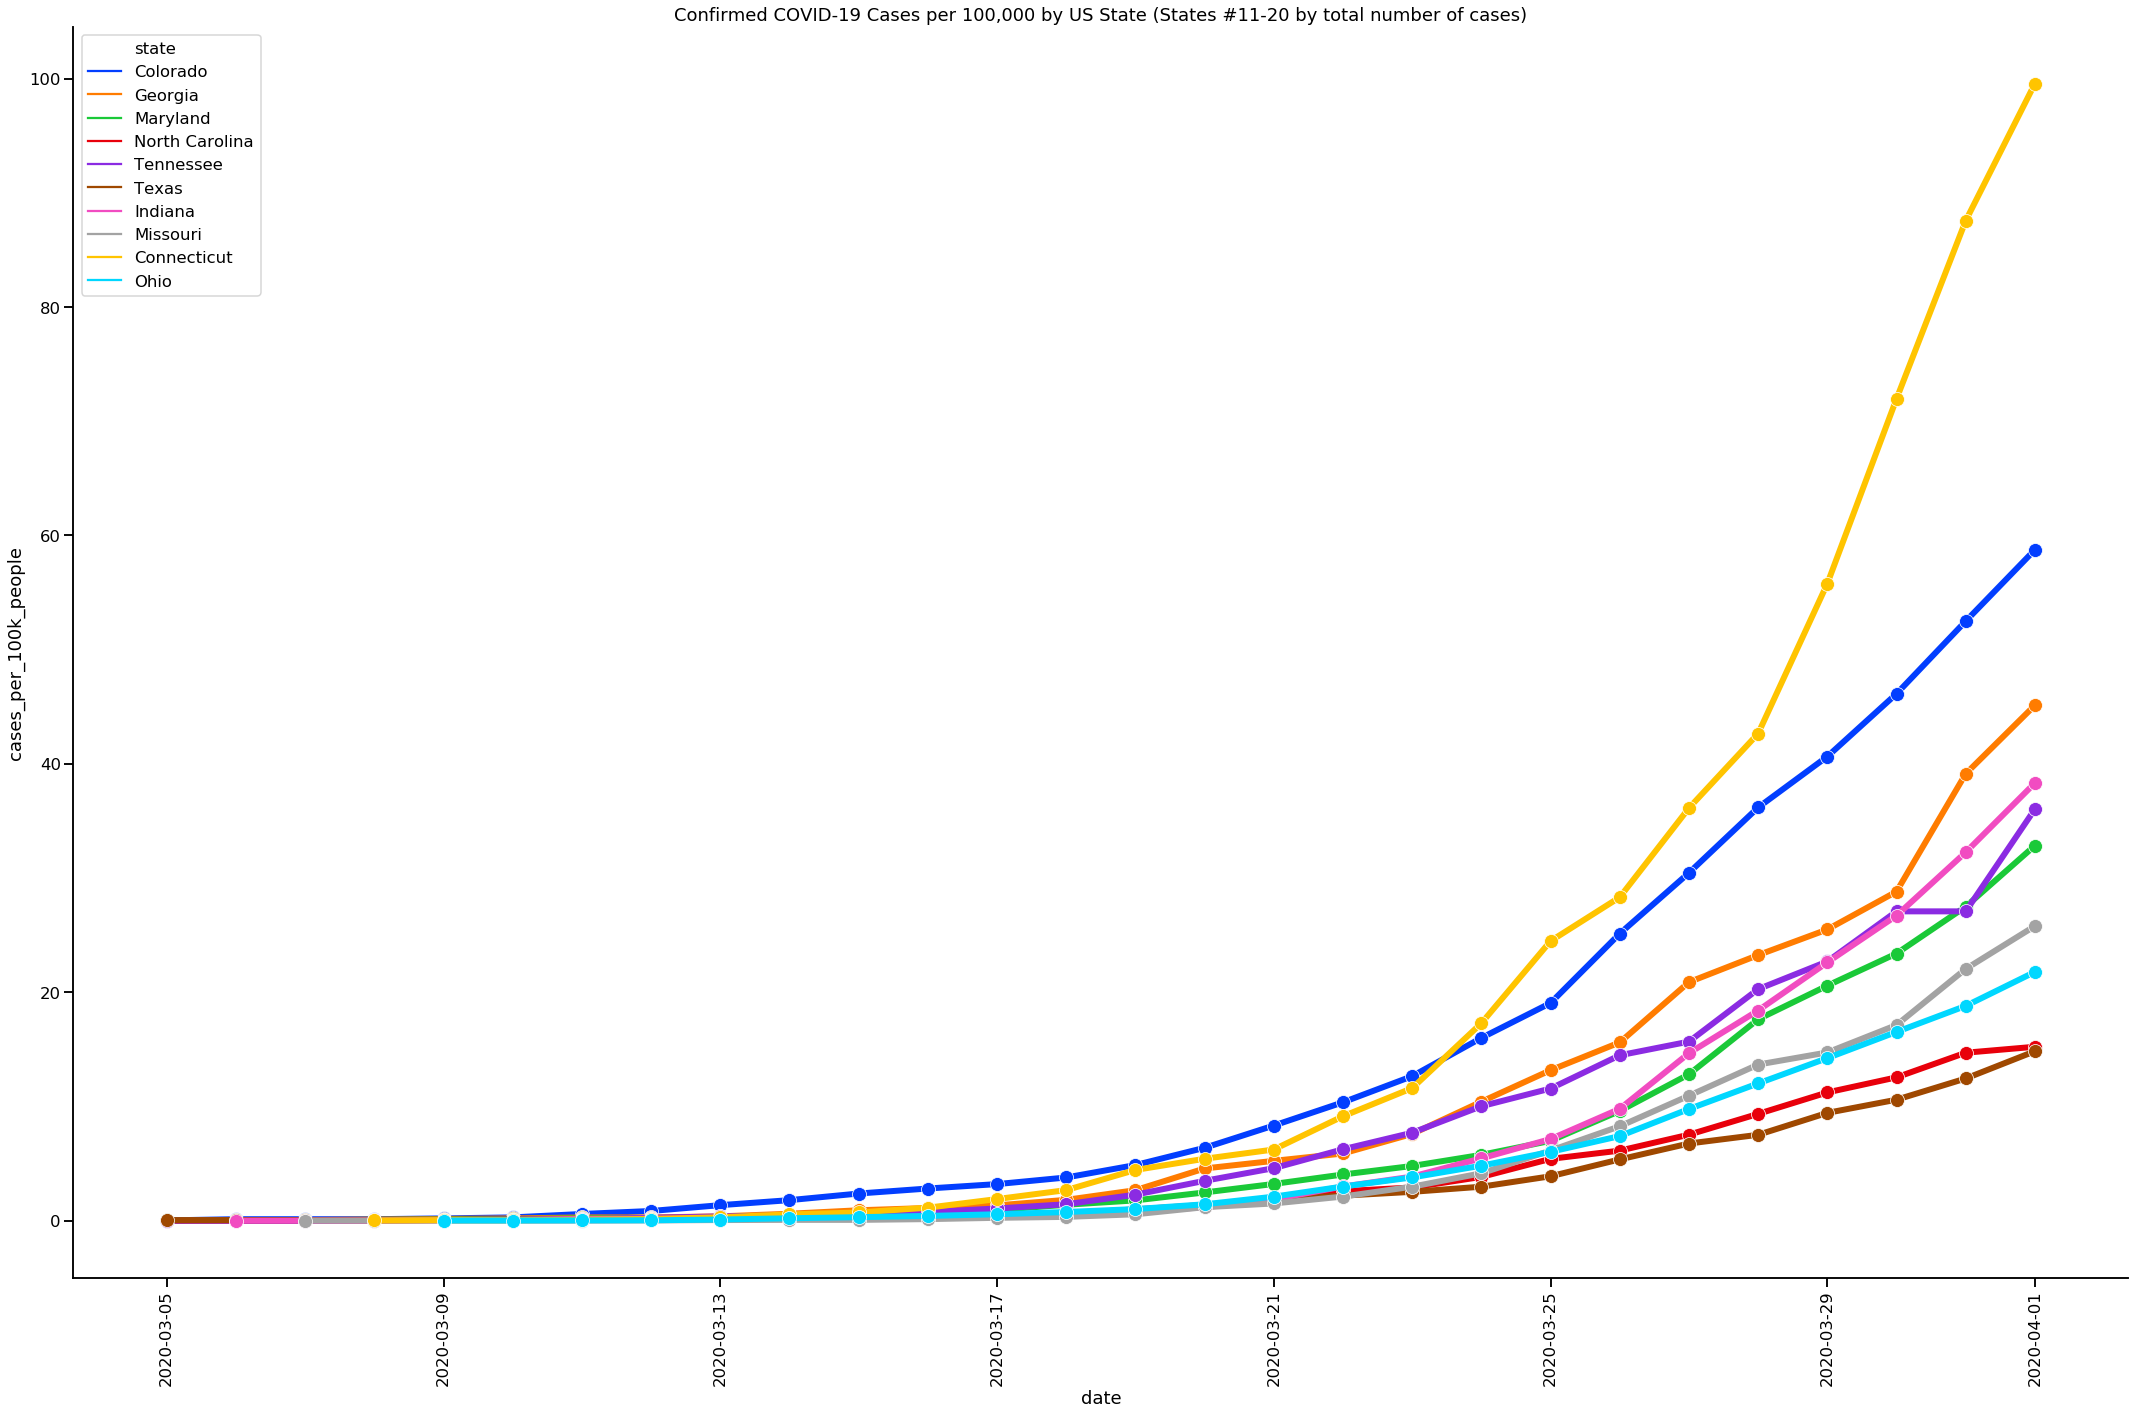

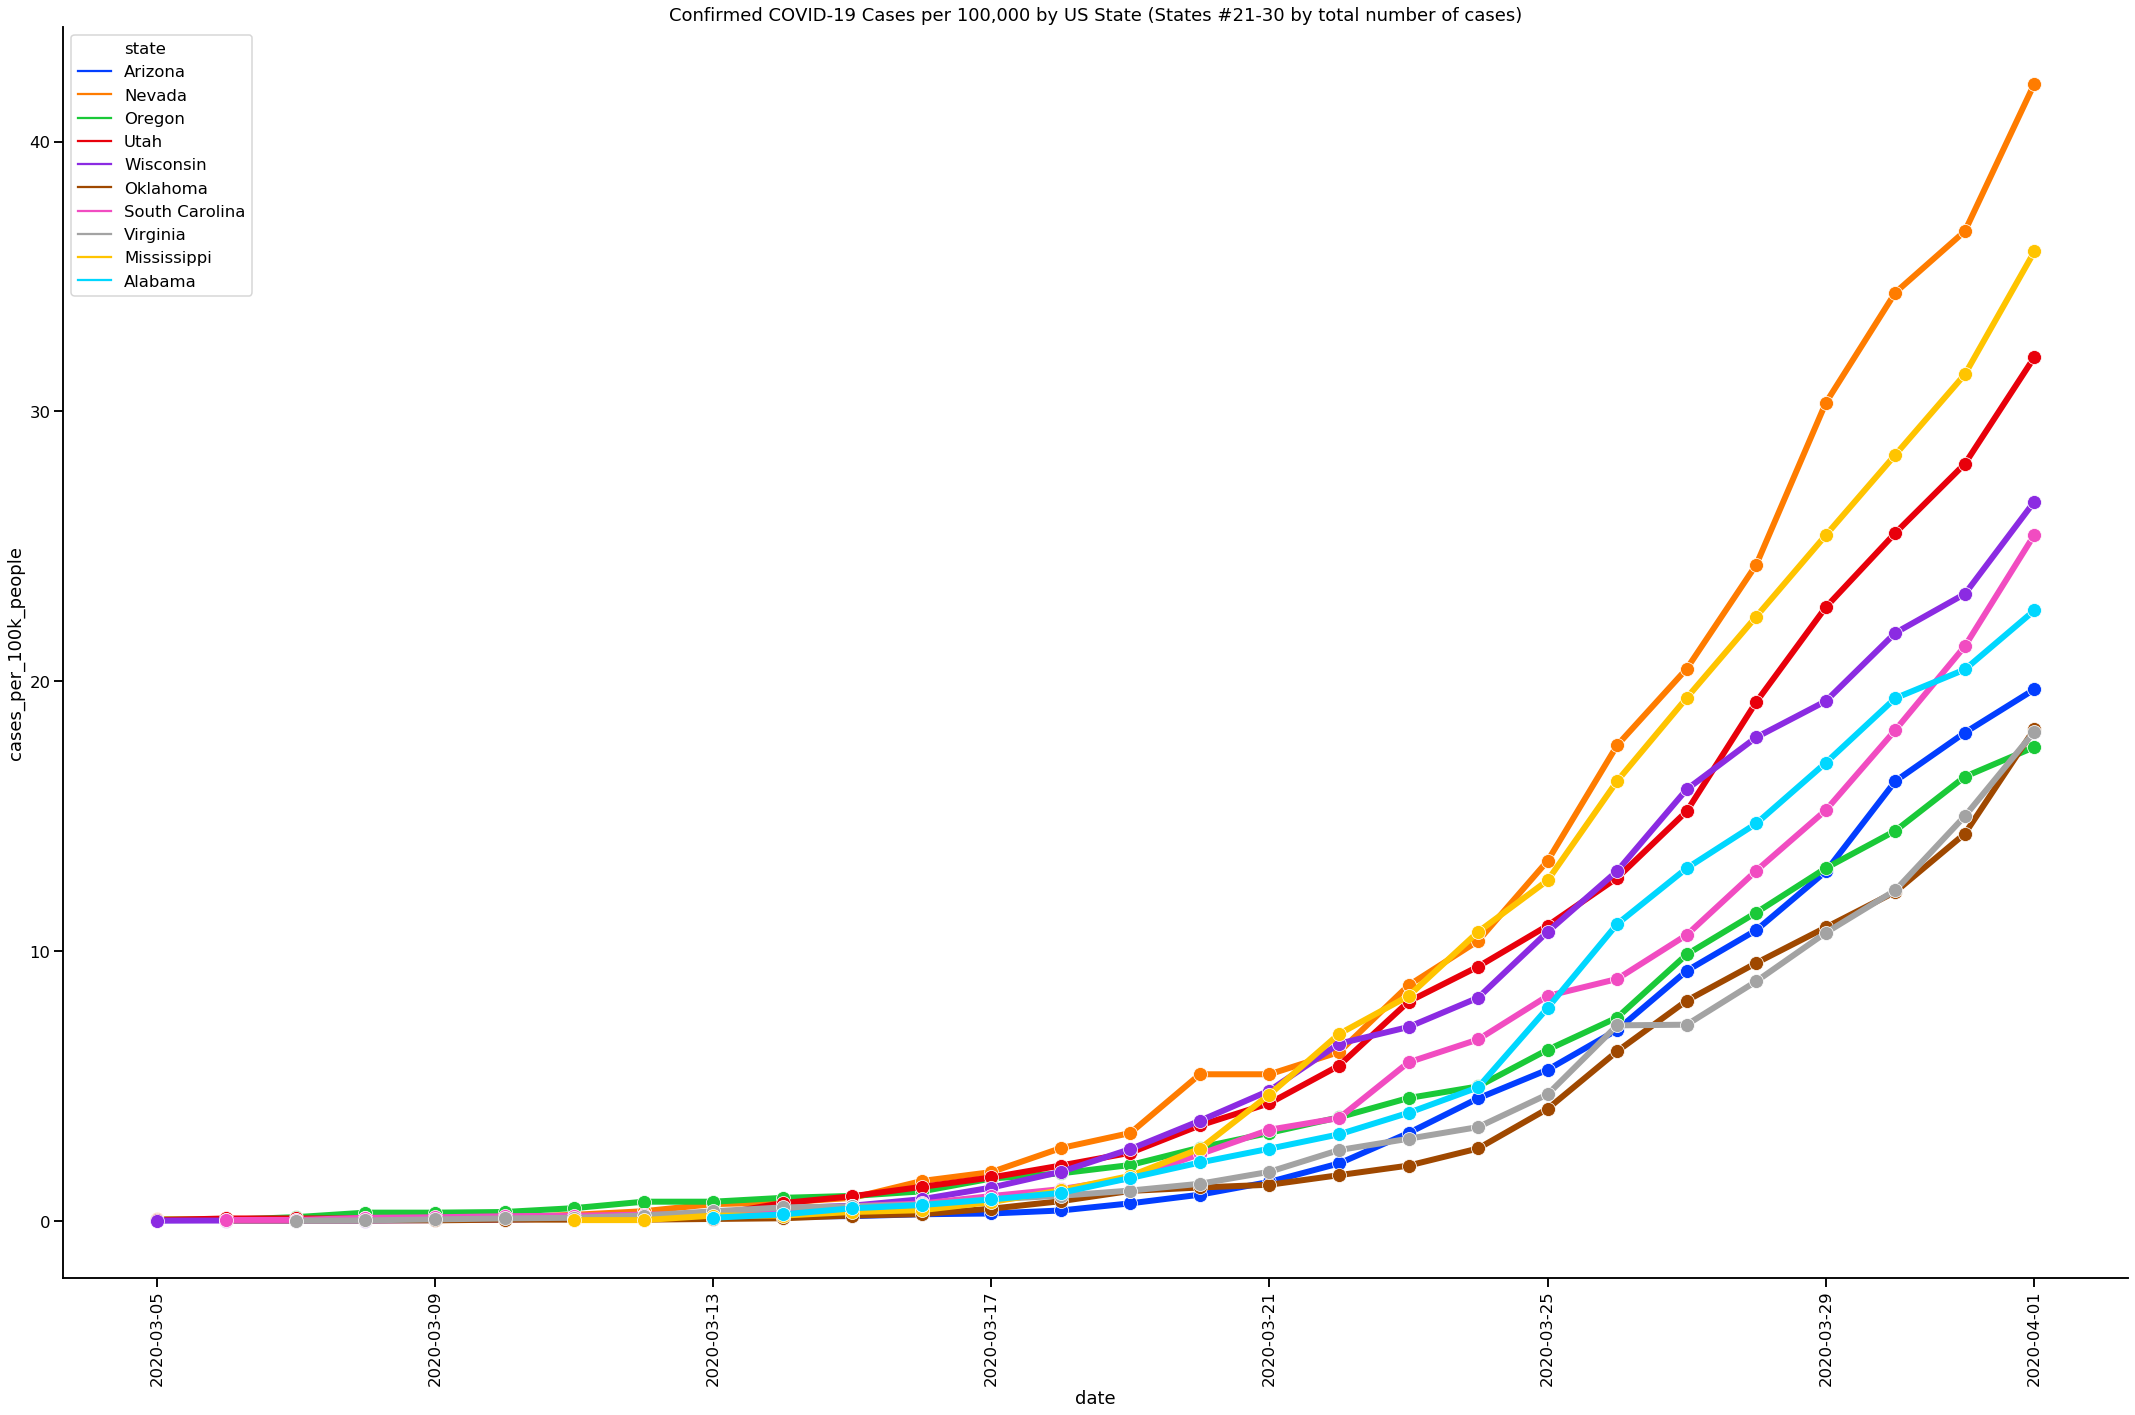

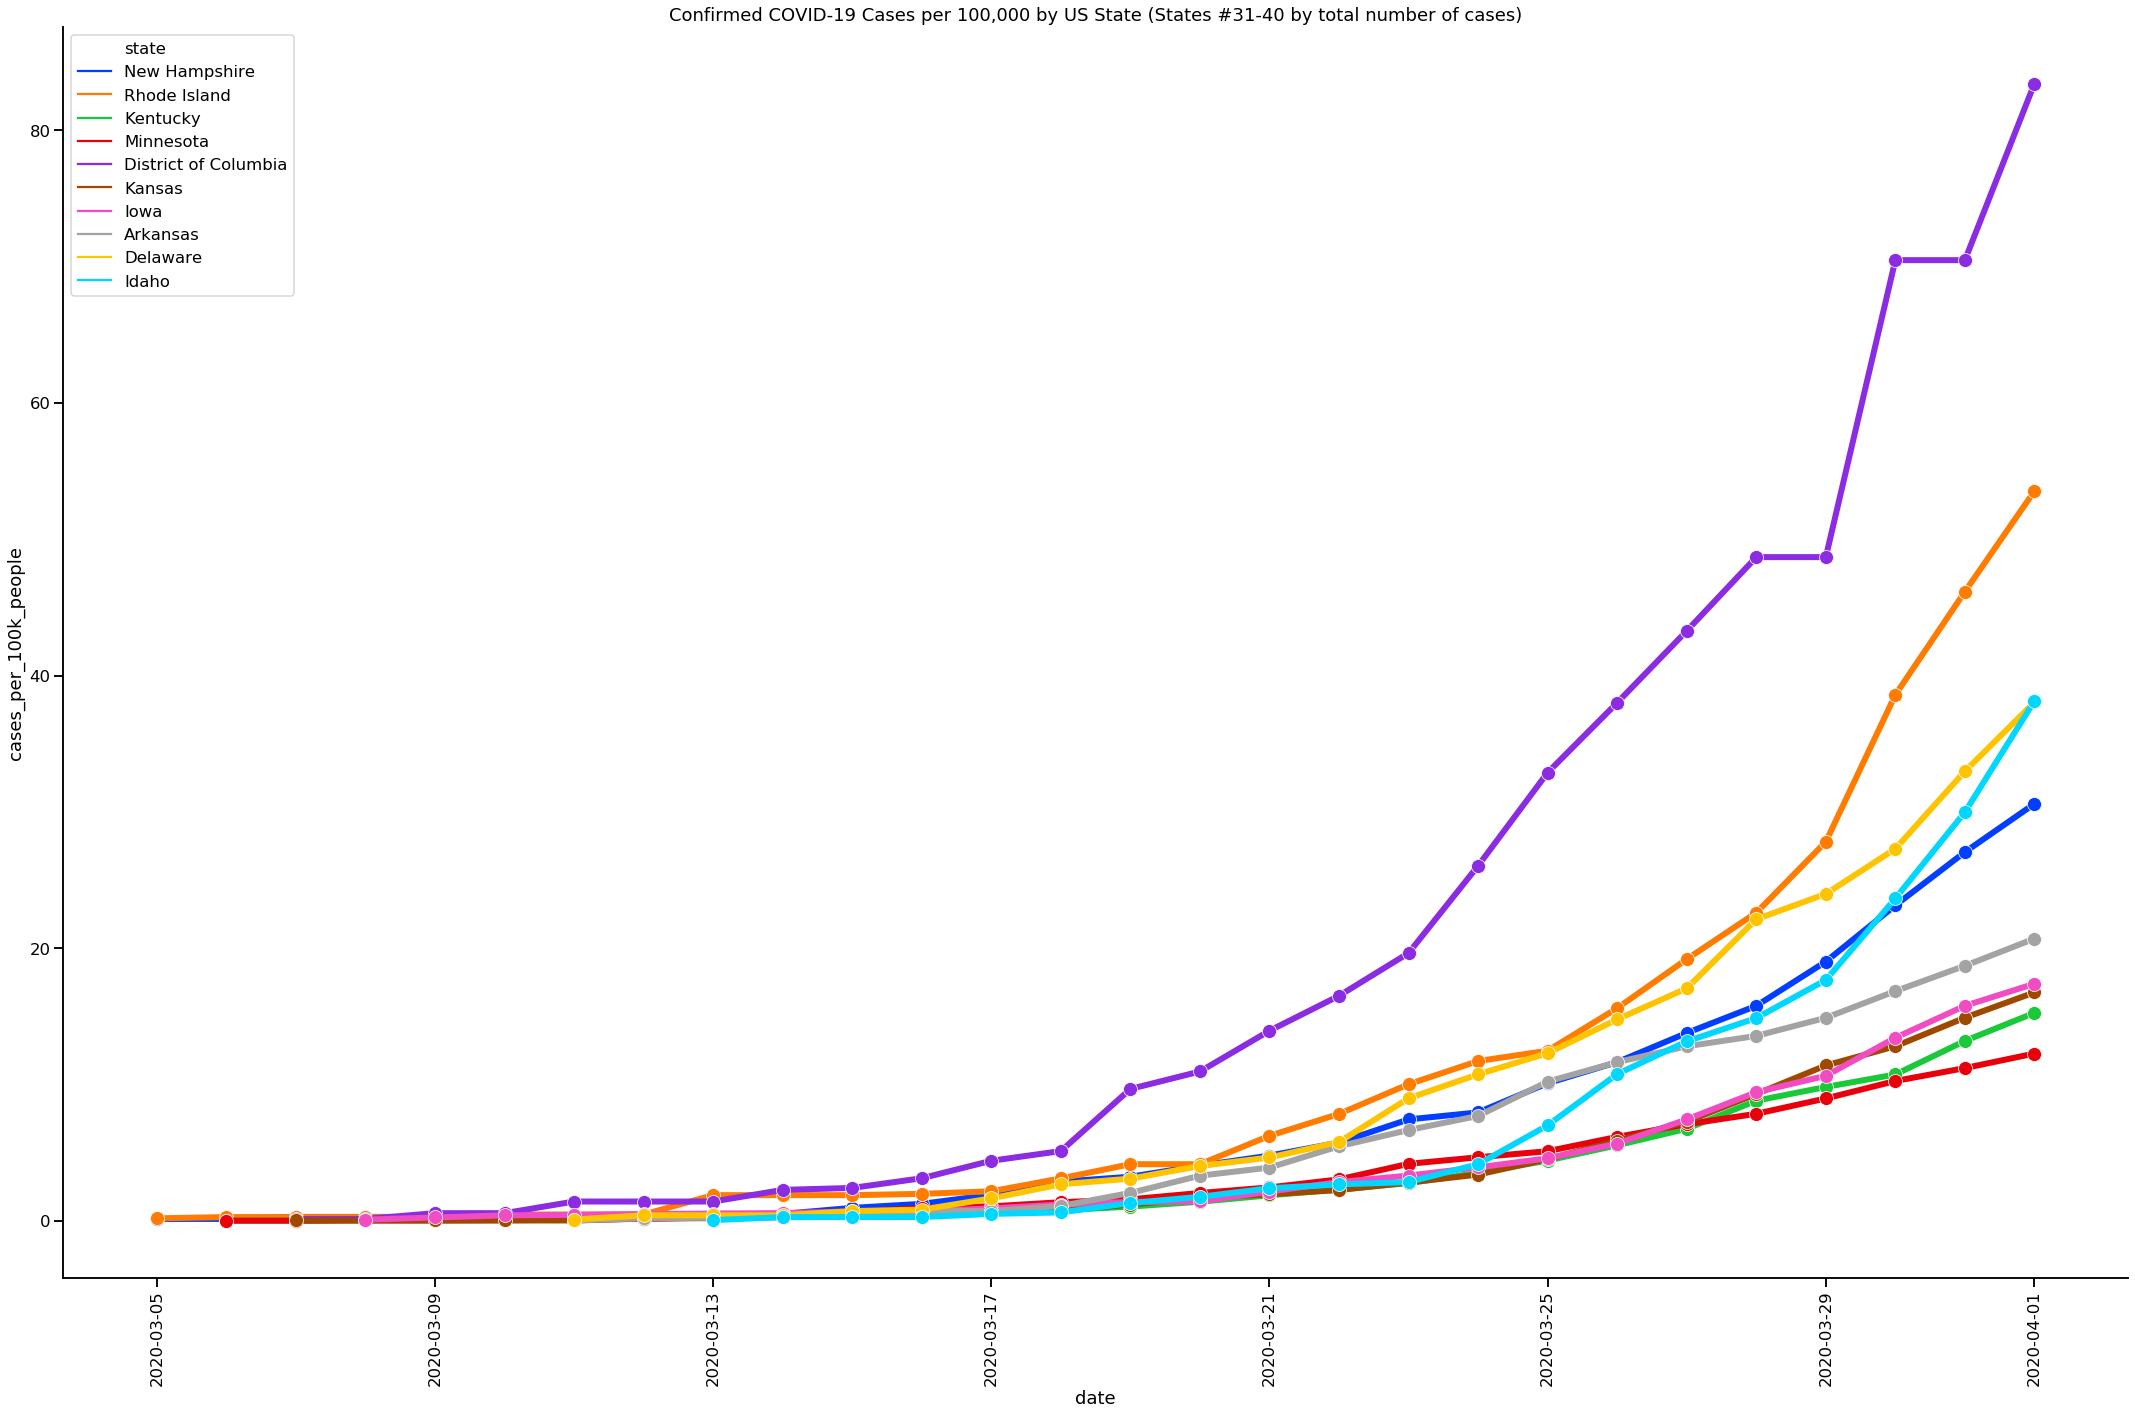

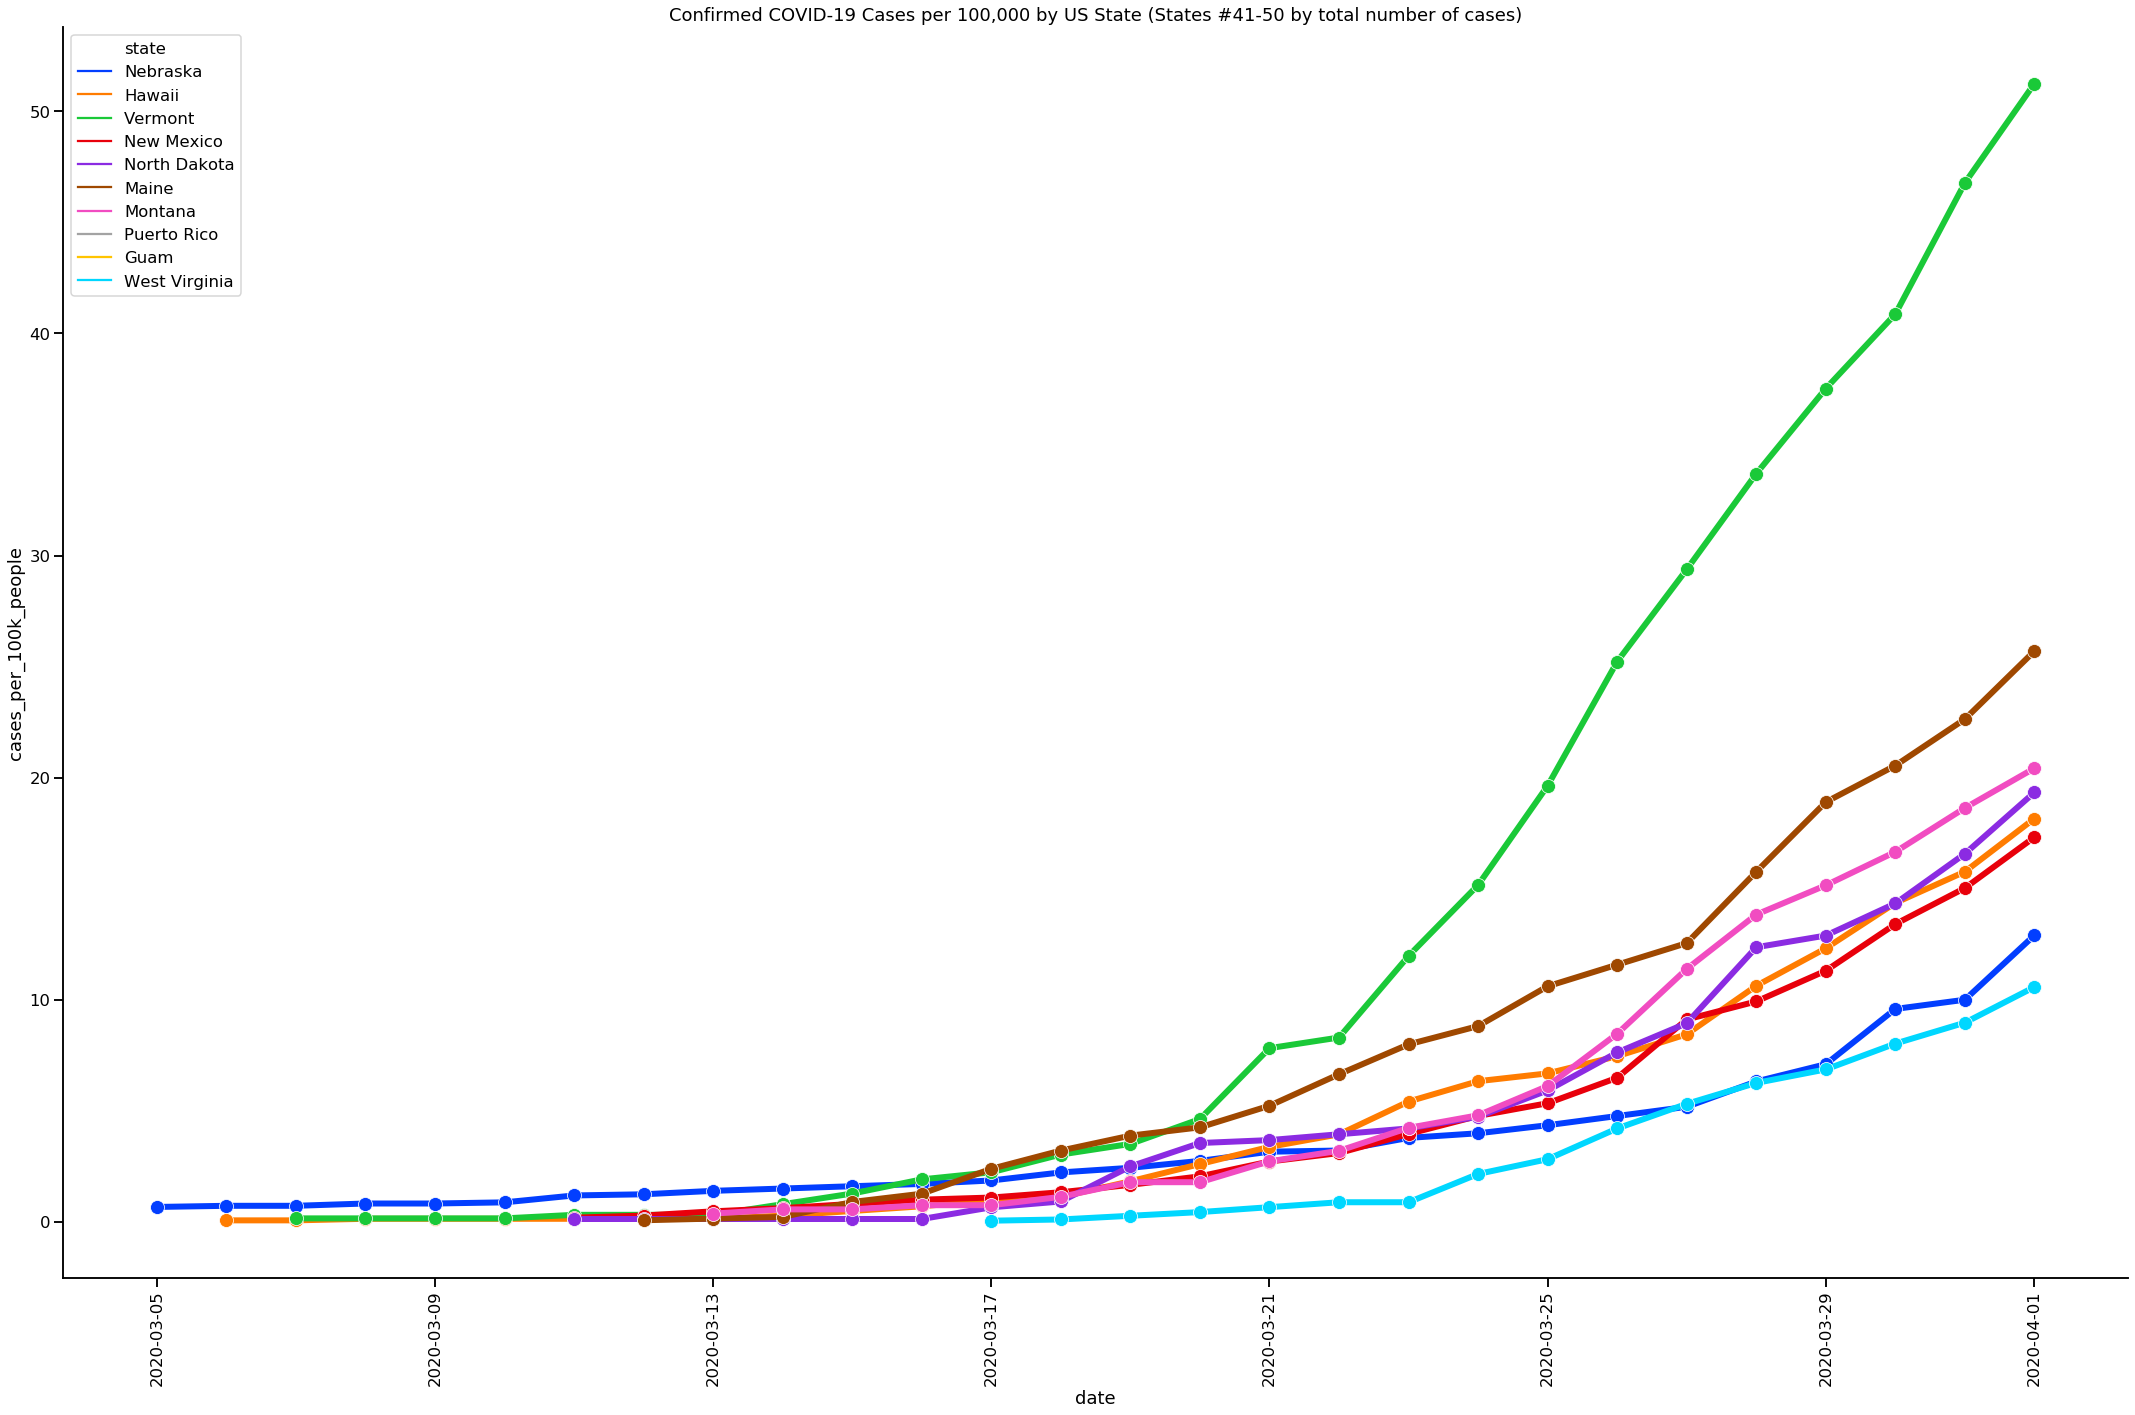

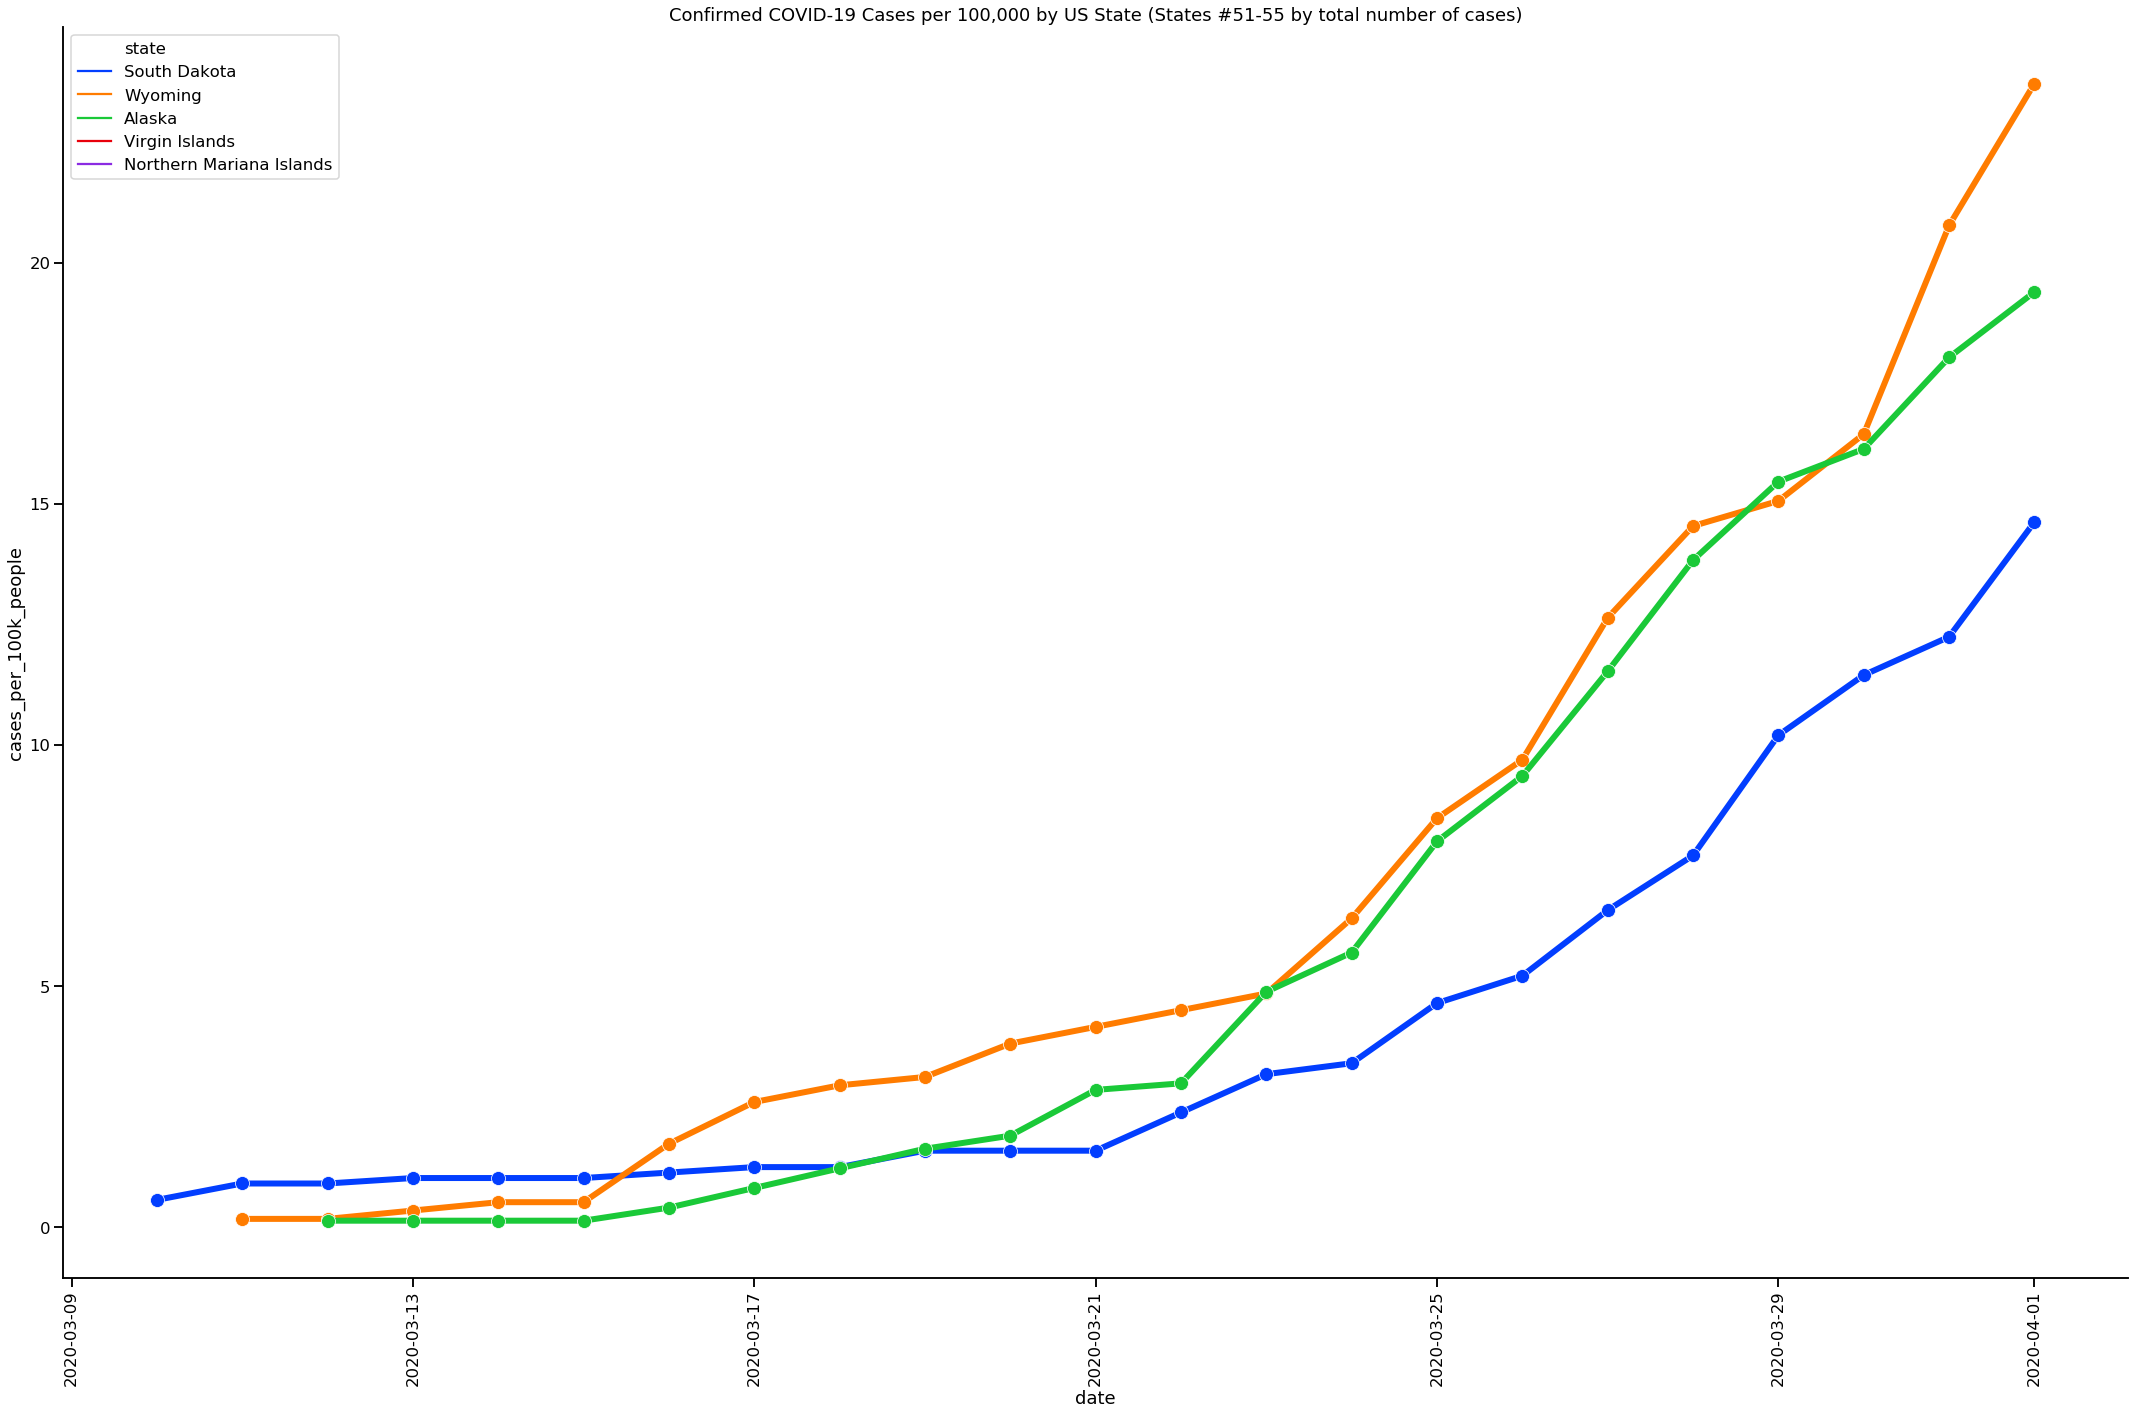

In [32]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)]
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(group)])
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Cases per 100,000 by US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of cases)')
    plt.tight_layout()
    sns.despine()
    plt.show()

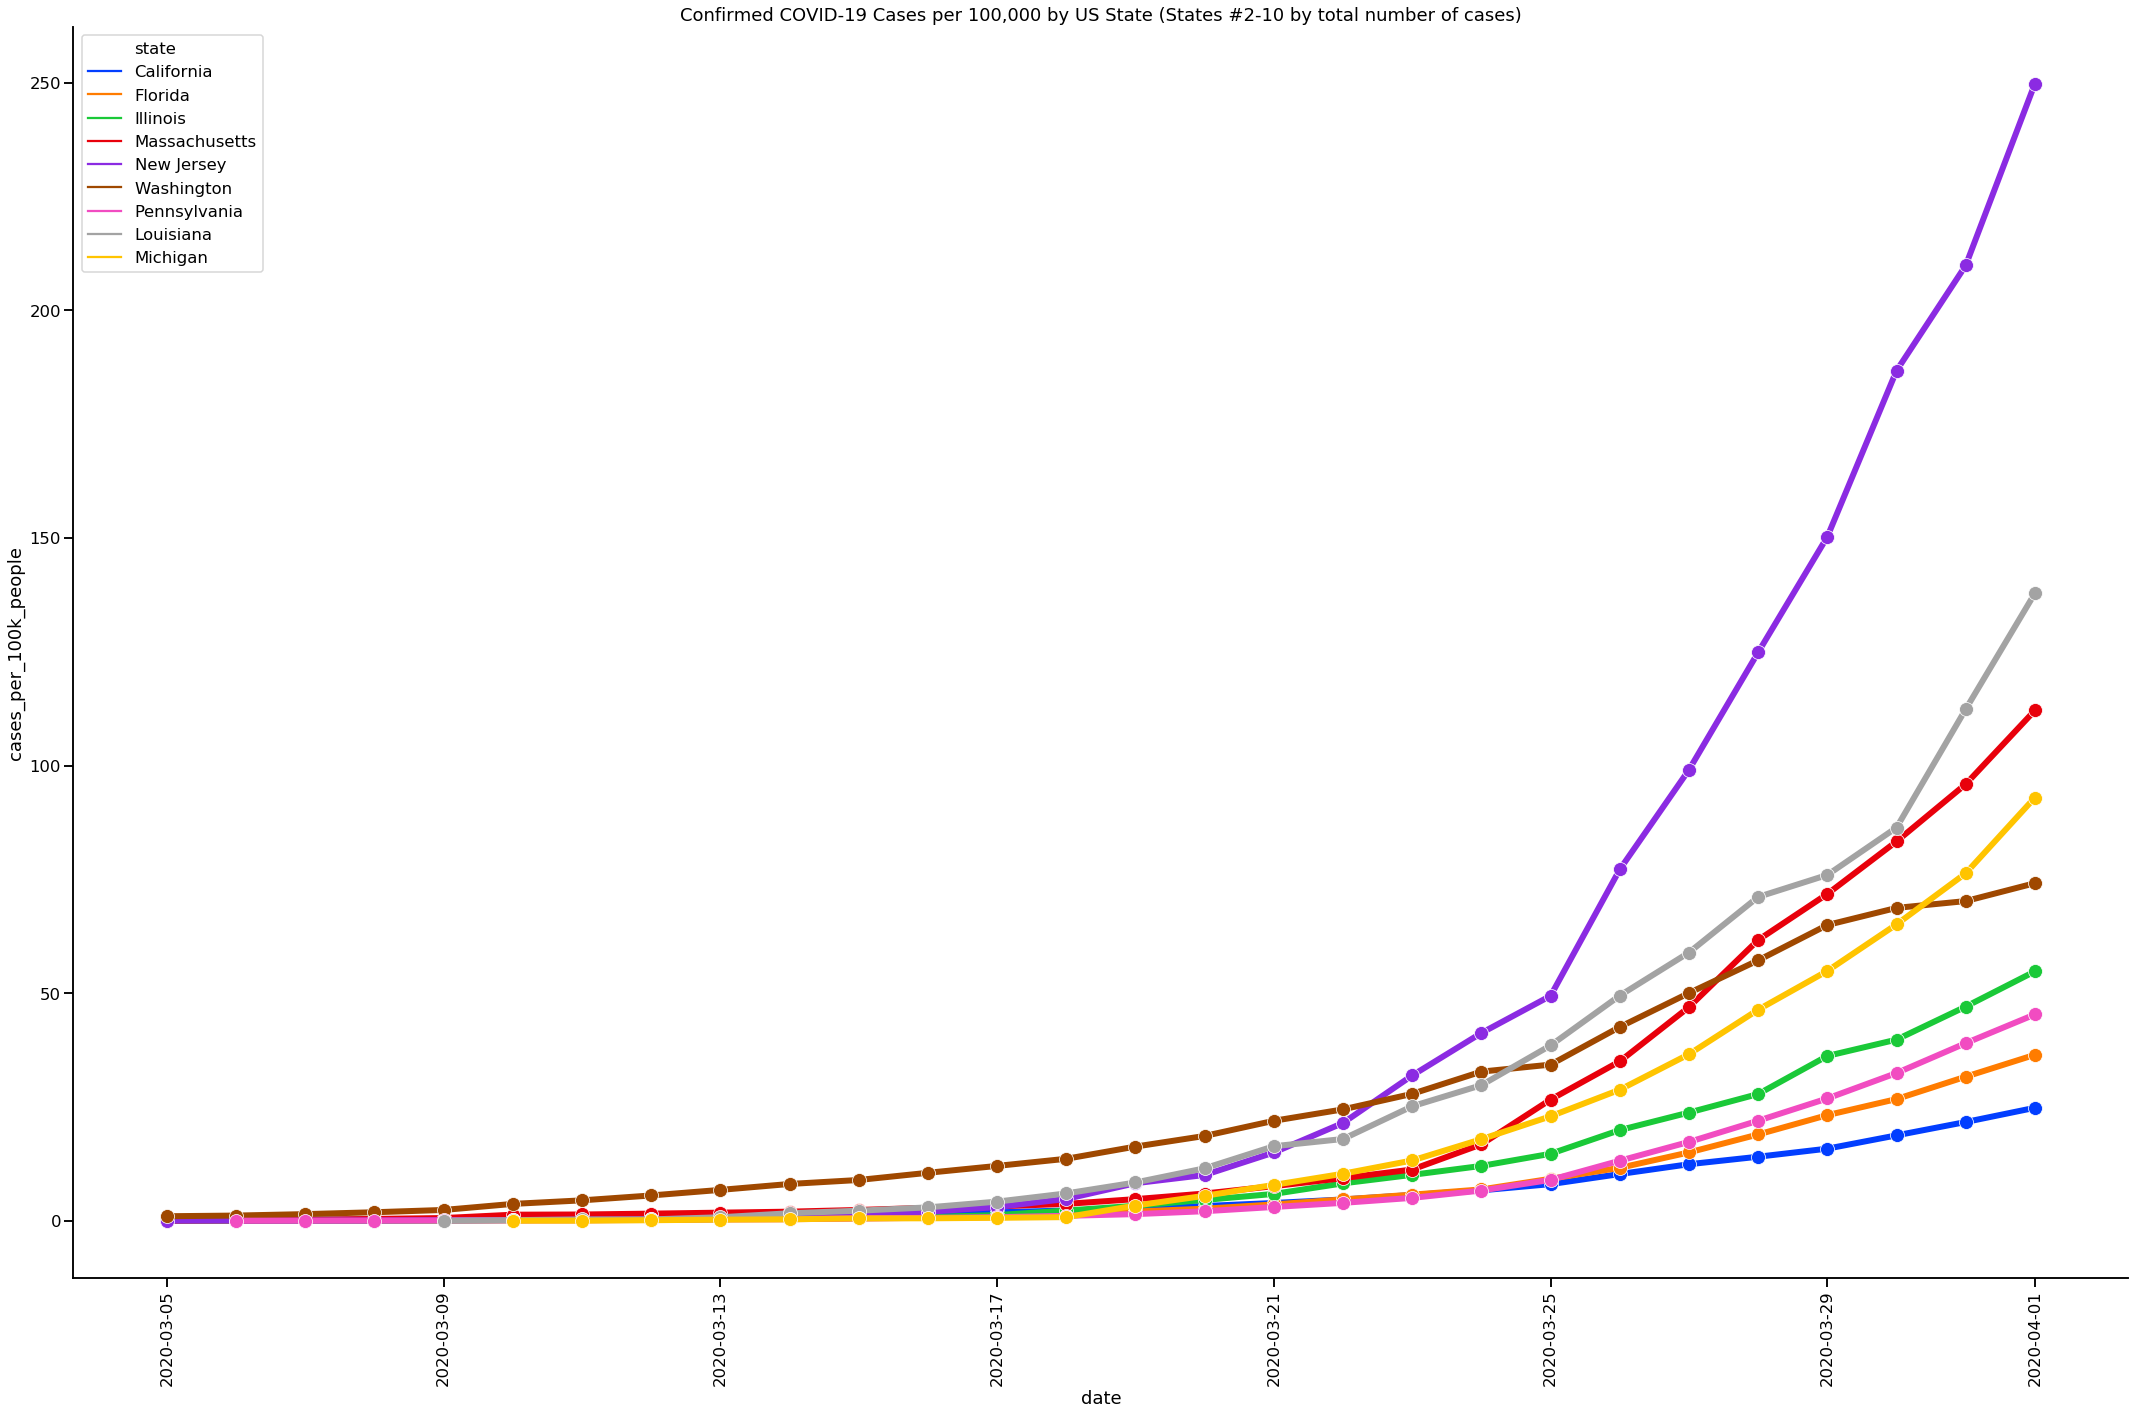

In [33]:
states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_2_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per 100,000 by US State (States #2-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()

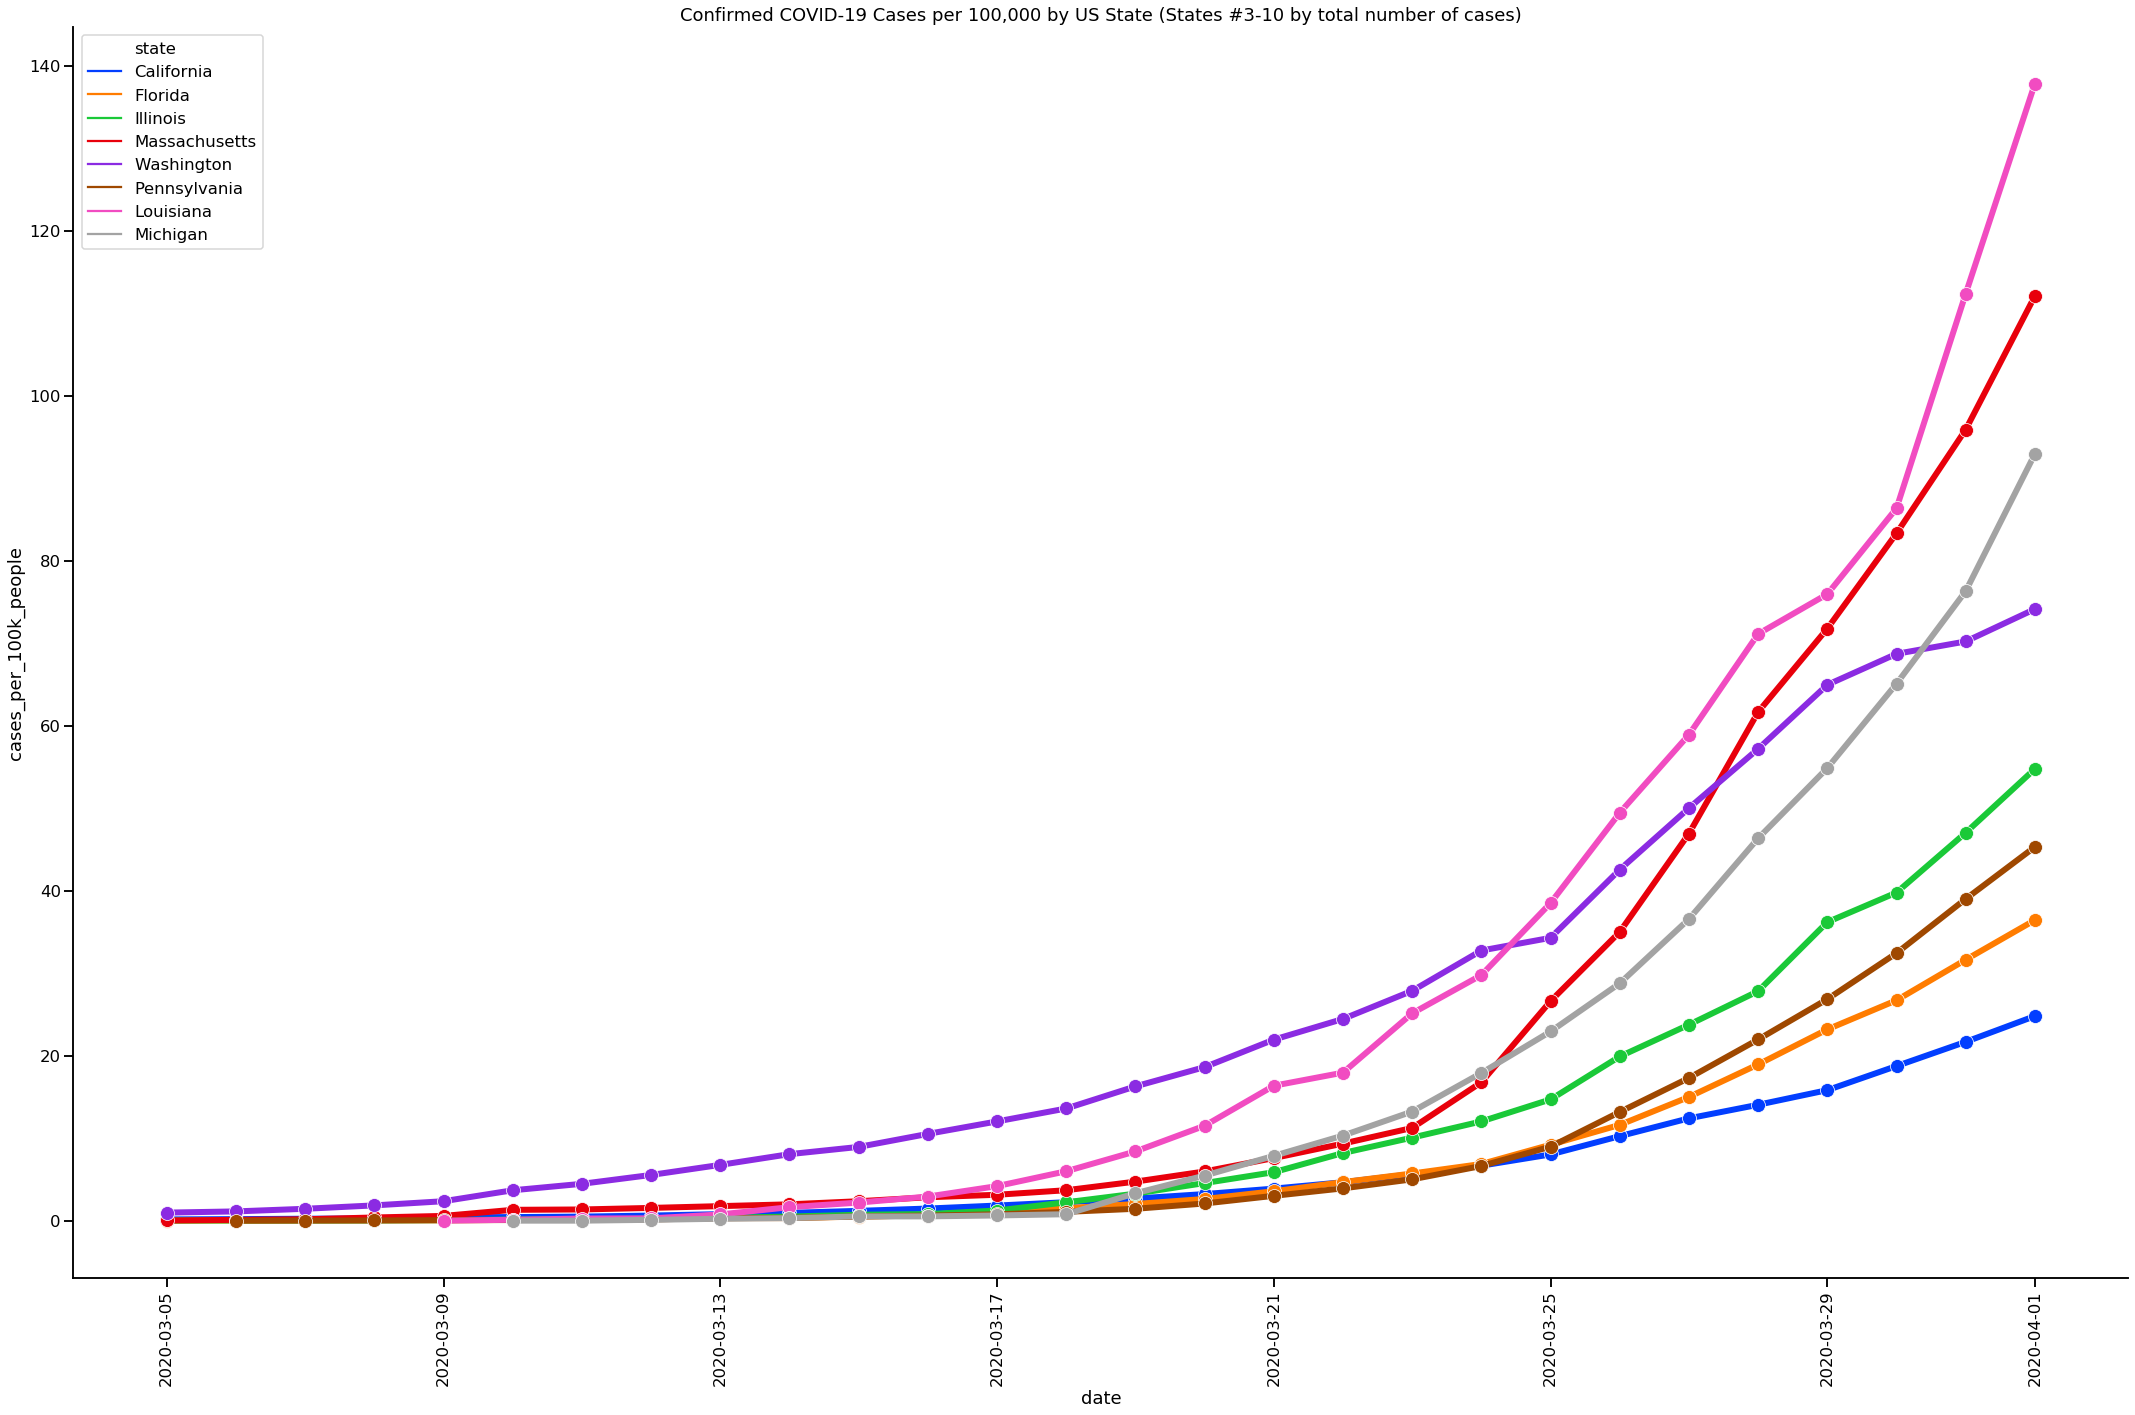

In [34]:
states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_3_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per 100,000 by US State (States #3-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()